## First analysis of FP generator results

In [21]:
import sys
sys.path.insert(1,'../vista-simulator/libs')
sys.path.insert(1,'../vista-simulator/pre_tactical/flight_plan_generator/0 fp_generator/py')

import pandas as pd
import numpy as np
import random
import standard_atmosphere as sa
import unit_conversions as uc
import utilities as u
import mysql_database as mysql
import airspace_particularities as ap
import geo_tools as gt
import fp_generator_functions as fgf
import matplotlib.pyplot as plt

import importlib
importlib.reload(mysql)
importlib.reload(u)
importlib.reload(fgf)

import configparser



local = 0

if local==0:
    hostname = '10.20.200.133'
    port     = 3306
    hostname = '10.20.198.170'
    password = 'IamLuisIswear'
else:
    hostname = '127.0.0.1'
    port     = 3306
    password = 'UoWaero'
    
username = 'luis'
database_ddr = 'airac_ddr_test'
database_vista = 'vistaenvironment'
database_bada3 = 'bada3'
database_bada4_1 = 'bada4'
database_bada4_2 = 'bada4_2'

scenario_id = 1

mysql_vista = mysql.DataAccessVista(hostname,port,username,password,database_vista)



In [3]:
#Options per flight
foptions = mysql_vista.read_number_options_per_schedule()


In [4]:
#READ SELECTION SCENARIO 0 - BASELINE
fs_0 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=0)
fs_0 = pd.merge(fs_0, foptions, on="schedule_id", how="left")

In [10]:
#READ SELECTION SCENARIO 4 - L FUEL
fs_4 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=4)
fs_4 = pd.merge(fs_4, foptions, on="schedule_id", how="left")

In [11]:
#READ SELECTION SCENARIO 5 - H FUEL
fs_5 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=5)
fs_5 = pd.merge(fs_5, foptions, on="schedule_id", how="left")

In [12]:
#READ SELECTION SCENARIO 6 - FABS
fs_6 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=6)
fs_6 = pd.merge(fs_6, foptions, on="schedule_id", how="left")

In [13]:
#READ SELECTION SCENARIO 7 - HOMO
fs_7 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=7)
fs_7 = pd.merge(fs_7, foptions, on="schedule_id", how="left")

In [14]:
#READ SELECTION SCENARIO 24 - L - FABS
fs_24 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=24)
fs_24 = pd.merge(fs_24, foptions, on="schedule_id", how="left")

In [15]:
#READ SELECTION SCENARIO 25 - L - HOMO
fs_25 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=25)
fs_25 = pd.merge(fs_25, foptions, on="schedule_id", how="left")

In [16]:
#READ SELECTION SCENARIO 26 - H - FAB
fs_26 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=26)
fs_26 = pd.merge(fs_26, foptions, on="schedule_id", how="left")

In [17]:
#READ SELECTION SCENARIO 27 - H - HOMO
fs_27 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=27)
fs_27 = pd.merge(fs_27, foptions, on="schedule_id", how="left")

In [19]:
#READ SELECTION SCENARIO 28 - LL FUEL
fs_28 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=28)
fs_28 = pd.merge(fs_28, foptions, on="schedule_id", how="left")

In [9]:
#READ SELECTION SCENARIO 29 - HH FUEL
fs_29 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=29)
fs_29 = pd.merge(fs_29, foptions, on="schedule_id", how="left")

In [6]:
#READ SELECTION SCENARIO 56 - CRCO ZERO
fs_56 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=56)
fs_56 = pd.merge(fs_56, foptions, on="schedule_id", how="left")

In [7]:
#READ SELECTION SCENARIO 56 - CRCO DOUBLE
fs_57 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=57)
fs_57 = pd.merge(fs_57, foptions, on="schedule_id", how="left")

In [8]:
#READ SELECTION SCENARIO 56 - CRCO IMBALANCE
fs_58 = mysql_vista.read_flights_selected(only_first_preference=True, limit_fields=True, scenario_id=58)
fs_58 = pd.merge(fs_58, foptions, on="schedule_id", how="left")

In [22]:
#MIN COSTS PER SCHEDULE - SCENARIO
d_min_cost = mysql_vista.read_min_crco_cost_fuel_cost()

In [20]:
#CHECK WHICH SCENARIOS THERE ARE IN THE READ DATA
fs_58[['scenario']].drop_duplicates()

,scenario
0,58


In [30]:
fs_0_m = pd.merge(fs_0,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_4_m = pd.merge(fs_4,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_5_m = pd.merge(fs_5,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_6_m = pd.merge(fs_6,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_7_m = pd.merge(fs_7,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_24_m = pd.merge(fs_24,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_25_m = pd.merge(fs_25,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_26_m = pd.merge(fs_26,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_27_m = pd.merge(fs_27,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_28_m = pd.merge(fs_28,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_29_m = pd.merge(fs_29,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_56_m = pd.merge(fs_56,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_57_m = pd.merge(fs_57,d_min_cost, on=['schedule_id','scenario'], how='left')
fs_58_m = pd.merge(fs_58,d_min_cost, on=['schedule_id','scenario'], how='left')

In [29]:
fs_0_m.head()

,schedule_id,trajectory_id,route_pool_id,icao_orig,icao_dest,order_preference,schedule_buffer_min,fuel_cost_EUR,crco_cost_EUR,doc_EUR,...,fp_min,fp_fuel_kg,scenario,SM_run,RG_run,TG_run,FPS_run,num_options,min_crco_cost_EUR,min_fuel_cost_EUR
0,5,1,45860,SAEZ,LIRF,1,27,51870.81,2457.121594,54327.931594,...,788.0,103741.62,0,0,1,1,61,3,2457.121594,50012.52
1,1381,4,46038,SUMU,LEMD,1,17,45556.50,2362.674339,47919.174339,...,693.0,91113.01,0,0,1,1,61,2,2362.674339,45556.50
2,90,6,48347,VHHH,LFPG,1,54,48144.74,4735.540858,52880.280858,...,741.0,96289.47,0,0,1,1,61,3,4629.084720,48144.74
3,75,10,45841,SAEZ,LEMD,1,-1,48179.91,2362.674339,50542.584339,...,721.0,96359.82,0,0,1,1,61,14,2062.330062,45307.87
4,26197,39,45842,SAEZ,LEMD,1,24,45274.22,2366.362344,47640.582344,...,696.0,90548.43,0,0,1,1,61,14,2062.330062,45274.22


## BOXPLOTS OF SOME METRICS

In [ ]:
#PLOT INFO IN BOXPLOTS
def plot_in_boxplot(fs,indicator,xlabels=None,ylabel="",title="",figsize=None,ylim=None):
    boxprops = dict(linestyle='-', linewidth=2, color='b')
    medianprops = dict(linestyle='-', linewidth=2, color='r')
    flierprops  = dict(color='#e7298a', alpha=0.5)
    flierprops={'alpha':0.8, 
                'markersize': 5,
                'markeredgecolor': 'None',
                'color': '#e7298a',
                'marker': 'o'
                }
    if figsize is None:
        figsize = [10,5]
    
    values = []
    scenarios = []
    for name, group in fs[['scenario',indicator]].groupby('scenario'):
        values = values + [group[indicator].tolist()]
        scenarios = scenarios + [name]
          
    # Multiple box plots on one Axes
    fig, ax = plt.subplots(figsize=figsize)
    bp = ax.boxplot(values,sym='m.',showmeans=True,
                    boxprops=boxprops,medianprops=medianprops,flierprops=flierprops)
    
    ax.set_xlim([0,len(fs['scenario'].drop_duplicates())+1])
    if ylim is not None:
        ax.set_ylim(ylim)
        
    if xlabels is not None:
        xlab=[]
        for s in scenarios:
            xlab= xlab + [xlabels.get(s)]
            
    else:
        xlab = scenarios
    ax.set_xticklabels(xlab)
        
    plt.title(title)
    plt.suptitle("")
    plt.xlabel("scenario")
    plt.ylabel(ylabel)
    
    plt.show()
    
dict_scenarios={0:'baseline',4:'low fuel',5:'high fuel',6:'FABs',7:'Homogenous',28:'very high fuel'}
    
plot_in_boxplot(fs,'fp_distance_nm',dict_scenarios,'NM','FP distance',ylim=None)
plot_in_boxplot(fs[fs['num_options']>10],'fp_distance_nm',dict_scenarios,'NM','FP distance more than one option',ylim=None)
plot_in_boxplot(fs,'schedule_buffer_min',dict_scenarios,'minutes','buffer',ylim=None)
plot_in_boxplot(fs,'fuel_cost_EUR',dict_scenarios,'EUR','fuel cost',ylim=None)
plot_in_boxplot(fs,'fuel_cost_EUR',dict_scenarios,'EUR','fuel cost',ylim=[-100,15000])
plot_in_boxplot(fs,'crco_cost_EUR',dict_scenarios,'EUR','CRCO cost',ylim=None)
plot_in_boxplot(fs[fs['num_options']>10],'crco_cost_EUR',dict_scenarios,'EUR','CRCO cost more than one option',ylim=None)





In [ ]:
dict_scenarios={0:'baseline',4:'low fuel',5:'high fuel',6:'FABs',7:'Homogenous',28:'very high fuel'}
    
plot_in_boxplot(fs,'fp_distance_nm',dict_scenarios,'NM','FP distance',ylim=None)
plot_in_boxplot(fs[fs['num_options']>10],'fp_distance_nm',dict_scenarios,'NM','FP distance more than one option',ylim=None)
plot_in_boxplot(fs,'schedule_buffer_min',dict_scenarios,'minutes','buffer',ylim=None)
plot_in_boxplot(fs,'fuel_cost_EUR',dict_scenarios,'EUR','fuel cost',ylim=None)
plot_in_boxplot(fs,'fuel_cost_EUR',dict_scenarios,'EUR','fuel cost',ylim=[-100,15000])
plot_in_boxplot(fs,'crco_cost_EUR',dict_scenarios,'EUR','CRCO cost',ylim=None)
plot_in_boxplot(fs[fs['num_options']>10],'crco_cost_EUR',dict_scenarios,'EUR','CRCO cost more than one option',ylim=None)




## LINEAL PLOTS OF METRICS

In [ ]:
fs.loc[(fs['scenario']==0)].head()

In [25]:
len(fs_0['FPS_run'].drop_duplicates())

50

In [32]:
fs_0_m.head()

,schedule_id,trajectory_id,route_pool_id,icao_orig,icao_dest,order_preference,schedule_buffer_min,fuel_cost_EUR,crco_cost_EUR,doc_EUR,...,fp_min,fp_fuel_kg,scenario,SM_run,RG_run,TG_run,FPS_run,num_options,min_crco_cost_EUR,min_fuel_cost_EUR
0,5,1,45860,SAEZ,LIRF,1,27,51870.81,2457.121594,54327.931594,...,788.0,103741.62,0,0,1,1,61,3,2457.121594,50012.52
1,1381,4,46038,SUMU,LEMD,1,17,45556.50,2362.674339,47919.174339,...,693.0,91113.01,0,0,1,1,61,2,2362.674339,45556.50
2,90,6,48347,VHHH,LFPG,1,54,48144.74,4735.540858,52880.280858,...,741.0,96289.47,0,0,1,1,61,3,4629.084720,48144.74
3,75,10,45841,SAEZ,LEMD,1,-1,48179.91,2362.674339,50542.584339,...,721.0,96359.82,0,0,1,1,61,14,2062.330062,45307.87
4,26197,39,45842,SAEZ,LEMD,1,24,45274.22,2366.362344,47640.582344,...,696.0,90548.43,0,0,1,1,61,14,2062.330062,45274.22


In [53]:
def dataframe_results(df,case):
    num_runs = len(df['FPS_run'].drop_duplicates())
    df['cost_CRCO_diff']=df['crco_cost_EUR']-df['min_crco_cost_EUR']
    df['cost_fuel_diff']=df['fuel_cost_EUR']-df['min_fuel_cost_EUR']
    df['cost_diff']=df['cost_CRCO_diff']+df['cost_fuel_diff']
    dfresults = pd.DataFrame([{'case':case,
                    'buffer min':df['schedule_buffer_min'].mean(),
                    'avg dist nm': df['fp_distance_nm'].mean(),
                    'total dist nm': df['fp_distance_nm'].sum()/num_runs,
                    'avg crco': df['crco_cost_EUR'].mean(),
                    'total crco K EUR':df['crco_cost_EUR'].sum()/1000/num_runs,
                    'avg time min': df['fp_min'].mean(),
                    'total time K min': df['fp_min'].sum()/1000/num_runs,
                    'avg fuel kg': df['fp_fuel_kg'].mean(),
                    'total cost K EUR':df['crco_cost_EUR'].sum()/1000/num_runs+df['fuel_cost_EUR'].sum()/1000/num_runs,
                    'avg diff cost crco EUR':df['cost_CRCO_diff'].mean(),
                    'avg diff cost fuel EUR':df['cost_fuel_diff'].mean(),
                    'avg diff cost EUR':df['cost_diff'].mean(),
                    'diff cost K EUR totat':df['cost_diff'].sum()/1000/num_runs}])
    
    return dfresults

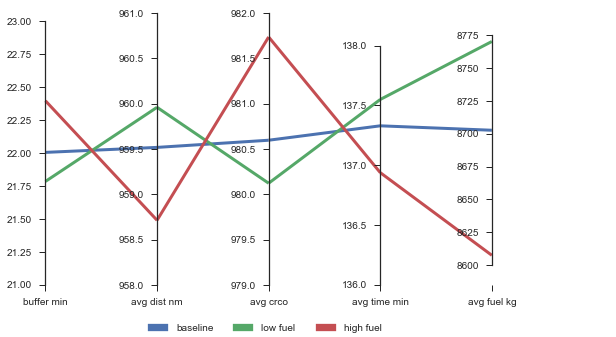

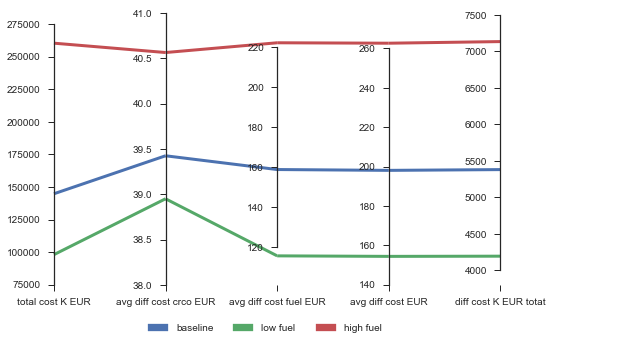

In [54]:

u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

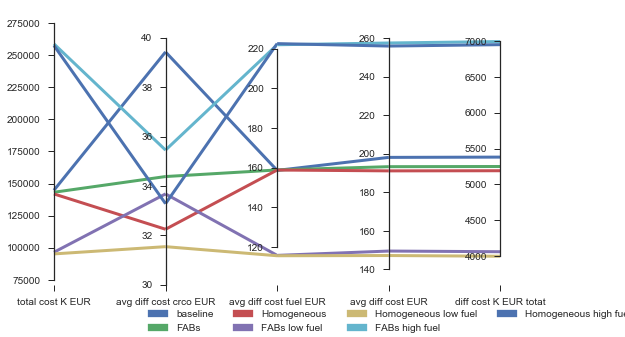

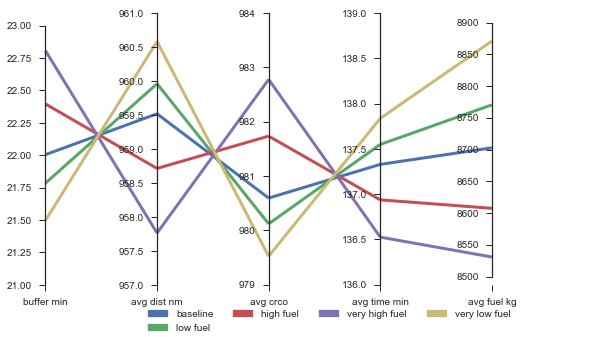

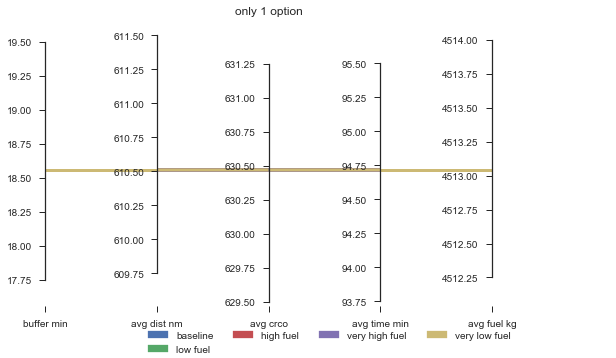

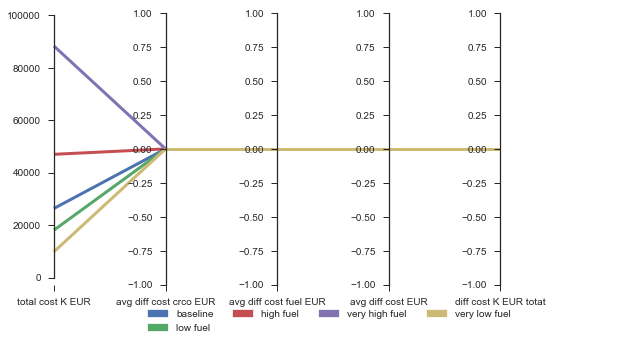

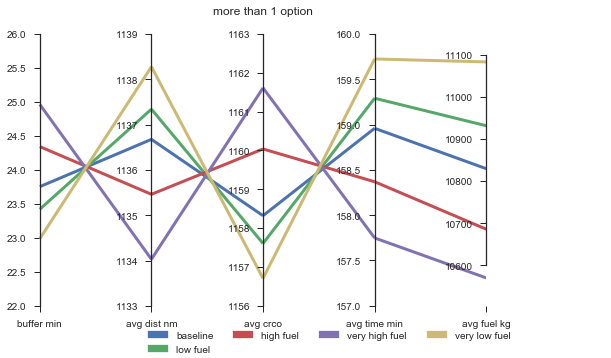

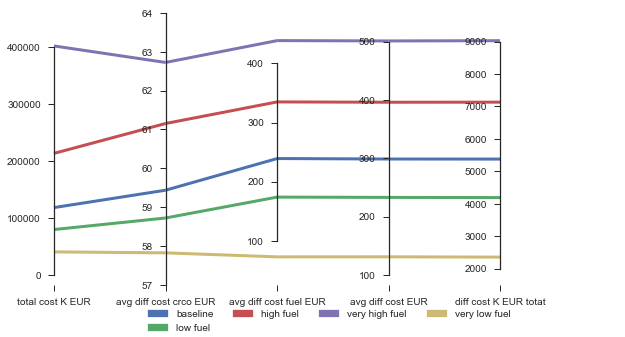

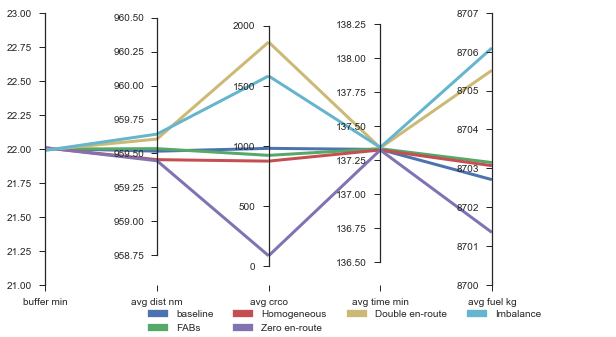

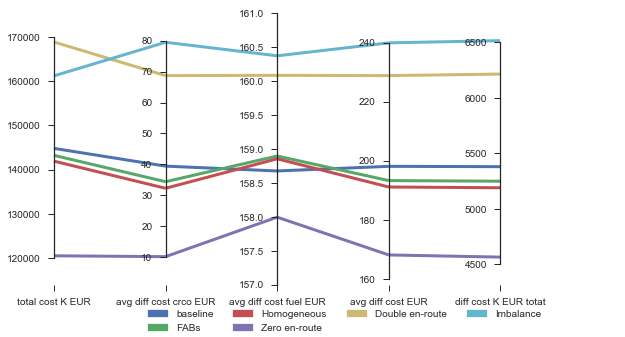

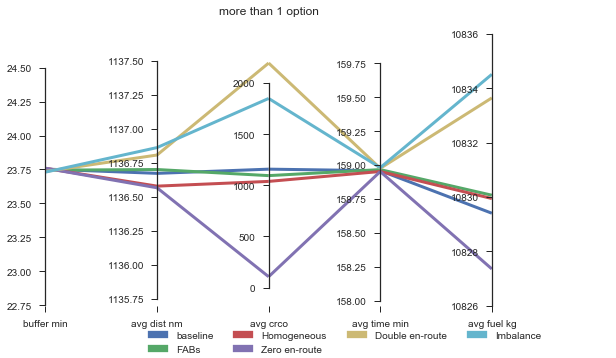

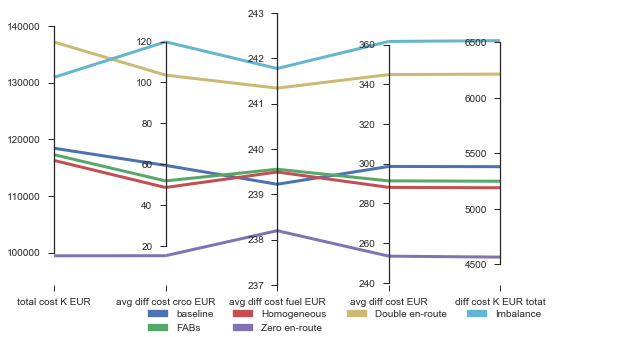

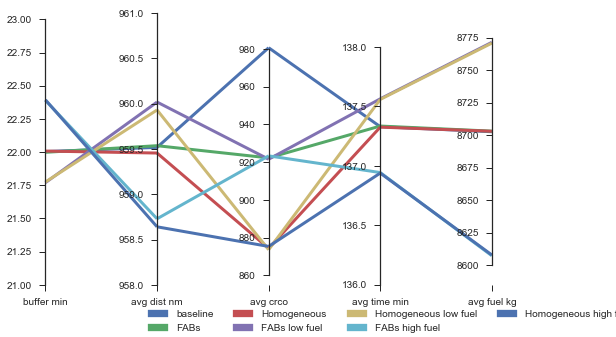

In [93]:
import general_tools3 as gt3
importlib.reload(gt3)
importlib.reload(u)


df = dataframe_results(fs_0_m,'baseline')\
    .append(dataframe_results(fs_4_m,'low fuel'))\
    .append(dataframe_results(fs_5_m,'high fuel'))\
    .append(dataframe_results(fs_28_m,'very high fuel'))\
    .append(dataframe_results(fs_29_m,'very low fuel'))
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','',fig_path="./fuel_all.png")

df = dataframe_results(fs_0_m.loc[fs_0_m['num_options']==1],'baseline')\
    .append(dataframe_results(fs_4_m.loc[fs_4_m['num_options']==1],'low fuel'))\
    .append(dataframe_results(fs_5_m.loc[fs_5_m['num_options']==1],'high fuel'))\
    .append(dataframe_results(fs_28_m.loc[fs_28_m['num_options']==1],'very high fuel'))\
    .append(dataframe_results(fs_29_m.loc[fs_29_m['num_options']==1],'very low fuel'))
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','only 1 option',fig_path="./fuel_1option.png")
u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')



df = dataframe_results(fs_0_m.loc[fs_0_m['num_options']>1],'baseline')\
    .append(dataframe_results(fs_4_m.loc[fs_4_m['num_options']>1],'low fuel'))\
    .append(dataframe_results(fs_5_m.loc[fs_5_m['num_options']>1],'high fuel'))\
    .append(dataframe_results(fs_28_m.loc[fs_28_m['num_options']>1],'very high fuel'))\
    .append(dataframe_results(fs_29_m.loc[fs_29_m['num_options']>1],'very low fuel'))
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','more than 1 option',fig_path="./fuel_more_one_option.png")
u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')




df = dataframe_results(fs_0_m,'baseline')\
    .append(dataframe_results(fs_6_m,'FABs'))\
    .append(dataframe_results(fs_7_m,'Homogeneous'))\
    .append(dataframe_results(fs_56_m,'Zero en-route'))\
    .append(dataframe_results(fs_57_m,'Double en-route'))\
    .append(dataframe_results(fs_58_m,'Imbalance'))
    
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','',fig_path="./crco_areas.png")
u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')



df = dataframe_results(fs_0_m.loc[fs_0_m['num_options']>1],'baseline')\
    .append(dataframe_results(fs_6_m.loc[fs_6_m['num_options']>1],'FABs'))\
    .append(dataframe_results(fs_7_m.loc[fs_7_m['num_options']>1],'Homogeneous'))\
    .append(dataframe_results(fs_56_m.loc[fs_56_m['num_options']>1],'Zero en-route'))\
    .append(dataframe_results(fs_57_m.loc[fs_57_m['num_options']>1],'Double en-route'))\
    .append(dataframe_results(fs_58_m.loc[fs_58_m['num_options']>1],'Imbalance'))
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','more than 1 option',fig_path="./crco_areas_more_than_one.png")
u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')

   
    

df = dataframe_results(fs_0_m,'baseline')\
    .append(dataframe_results(fs_6_m,'FABs'))\
    .append(dataframe_results(fs_7_m,'Homogeneous'))\
    .append(dataframe_results(fs_24_m,'FABs low fuel'))\
    .append(dataframe_results(fs_25_m,'Homogeneous low fuel'))\
    .append(dataframe_results(fs_26_m,'FABs high fuel'))\
    .append(dataframe_results(fs_27_m,'Homogeneous high fuel'))
        
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','')
u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','',fig_path="./crco_and_fuel_all.png")

   

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

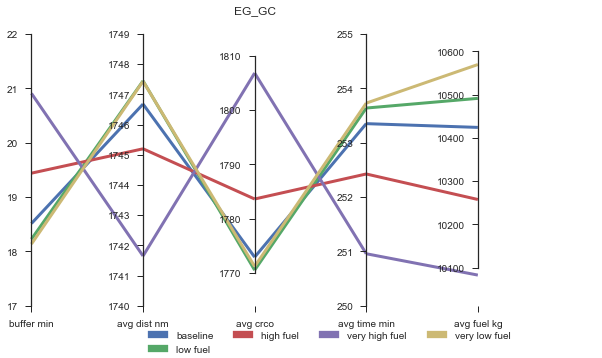

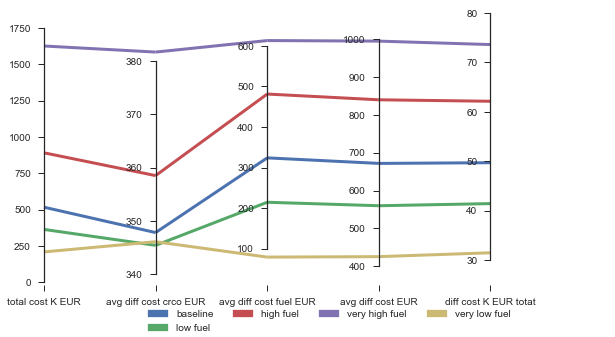

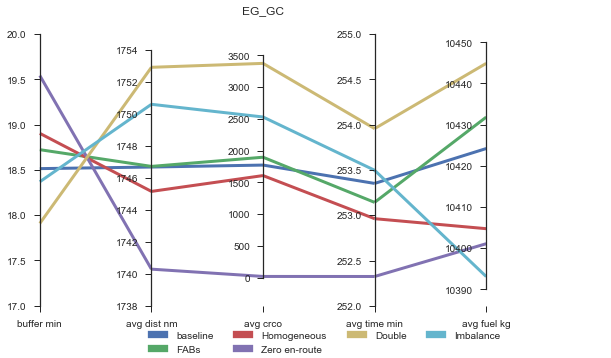

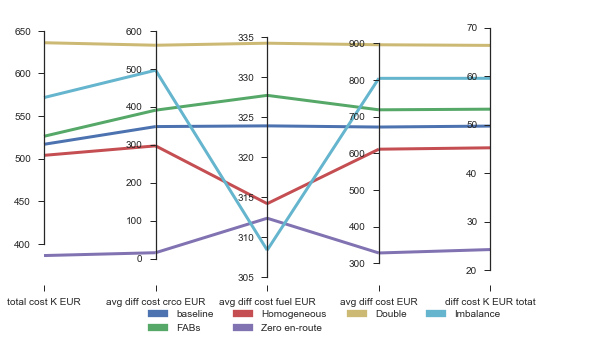

In [97]:
orig="EBBR"
dest="LTBA"

orig="EG"
dest="GC"

orig="GCTS"
dest="EGKK"

orig="EG"
dest="GC"



df = dataframe_results(fs_0_m[fs_0_m['icao_orig'].str.startswith(orig) & fs_0_m['icao_dest'].str.startswith(dest)],'baseline')\
    .append(dataframe_results(fs_4_m[fs_4_m['icao_orig'].str.startswith(orig) & fs_4_m['icao_dest'].str.startswith(dest)],'low fuel'))\
    .append(dataframe_results(fs_5_m[fs_5_m['icao_orig'].str.startswith(orig) & fs_5_m['icao_dest'].str.startswith(dest)],'high fuel'))\
    .append(dataframe_results(fs_28_m[fs_28_m['icao_orig'].str.startswith(orig) & fs_28_m['icao_dest'].str.startswith(dest)],'very high fuel'))\
    .append(dataframe_results(fs_29_m[fs_29_m['icao_orig'].str.startswith(orig) & fs_29_m['icao_dest'].str.startswith(dest)],'very low fuel'))
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case',orig+"_"+dest,fig_path="./"+orig+"_"+dest+"_fuel.png")

u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')



df = dataframe_results(fs_0_m[fs_0_m['icao_orig'].str.startswith(orig) & fs_0_m['icao_dest'].str.startswith(dest)],'baseline')\
    .append(dataframe_results(fs_6_m[fs_6_m['icao_orig'].str.startswith(orig) & fs_6_m['icao_dest'].str.startswith(dest)],'FABs'))\
    .append(dataframe_results(fs_7_m[fs_7_m['icao_orig'].str.startswith(orig) & fs_7_m['icao_dest'].str.startswith(dest)],'Homogeneous'))\
    .append(dataframe_results(fs_56_m[fs_56_m['icao_orig'].str.startswith(orig) & fs_56_m['icao_dest'].str.startswith(dest)],'Zero en-route'))\
    .append(dataframe_results(fs_57_m[fs_57_m['icao_orig'].str.startswith(orig) & fs_57_m['icao_dest'].str.startswith(dest)],'Double'))\
    .append(dataframe_results(fs_58_m[fs_58_m['icao_orig'].str.startswith(orig) & fs_58_m['icao_dest'].str.startswith(dest)],'Imbalance'))
       
    
u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case',orig+"_"+dest,fig_path="./"+orig+"_"+dest+"_charges.png")

u.plot_results_line(df[['case','total cost K EUR','avg diff cost crco EUR','avg diff cost fuel EUR',
                       'avg diff cost EUR','diff cost K EUR totat']],'case','')


In [ ]:

df=dataframe_results(fs.loc[(fs['scenario']==0)],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4)],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5)],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg',
                       'total cost K EUR']],'case','')



In [ ]:

gt3.bootstrap_mean_test(fs.loc[(fs['scenario']==5) & (fs['icao_orig']=="LTBA")
                               & (fs['icao_dest']=="EGKK") ,'crco_cost_EUR'].tolist(),
                        fs.loc[(fs['scenario']==4) & (fs['icao_orig']=="LTBA")
                               & (fs['icao_dest']=="EGKK"),'crco_cost_EUR'].tolist())



In [ ]:
orig="LPPT"
dest="EGLL"

orig=""
dest=""

orig="GCTS"
dest="EGKK"

importlib.reload(u)

print(len(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))]))

df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'high fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==28) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'very high fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==29) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'very low fuel')))))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg',
                       'total cost K EUR']],'case',orig+"_"+dest)


In [ ]:
orig="GCTS"
dest="EGKK"

print(len(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))]))

df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'high fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==28) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'very high fuel'))))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg',
                       'total cost K EUR']],'case',orig+"_"+dest)


In [ ]:


df=dataframe_results(fs.loc[(fs['scenario']==0)],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4)],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5)],'high fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==28)],'very high fuel'))))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg',
                       'total cost K EUR']],'case','')


In [ ]:
#gt3.bootstrap_mean_test(fs.loc[(fs['scenario']==28) ,'fp_fuel_kg'].tolist(),
#                        fs.loc[(fs['scenario']==4) ,'fp_fuel_kg'].tolist())

gt3.bootstrap_mean_test(fs.loc[(fs['scenario']==28) & (fs['num_options']>1) ,'crco_cost_EUR'].tolist(),
                        fs.loc[(fs['scenario']==4) & (fs['num_options']>1),'crco_cost_EUR'].tolist())


In [ ]:
importlib.reload(u)
intensity=[0.05073502850735363,
0.07887848457848254,
0.21389724909266864,
0.04426497577679454,
0.61222426204470066]

u.order_option(intensity)

In [ ]:
order_values

In [ ]:
np.argsort(order_values)+1

In [ ]:

df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==6) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==7) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg',
                       'total cost K EUR']],'case',orig+"_"+dest)

 ## MAPS O-D PAIR AND DEMAND BETWEEN ROUTES

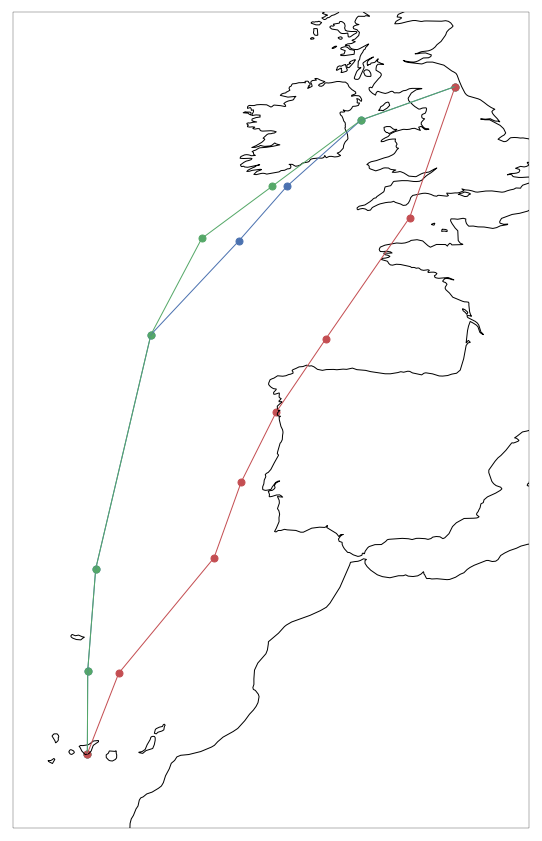

In [81]:
import cartopy.crs as ccrs
icao_orig="EGNT"
icao_dest="GCTS"

d_coords_route_pool = mysql_vista.read_coord_trajectory_route(icao_orig,icao_dest)

unique_id = d_coords_route_pool['id'].drop_duplicates()

min_lon = min(d_coords_route_pool['lon'])
max_lon = max(d_coords_route_pool['lon'])
min_lat = min(d_coords_route_pool['lat'])
max_lat = max(d_coords_route_pool['lat'])

scale = 5

fig=plt.figure(figsize=(2.61538461538*scale, 3*scale))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon-3,max_lon+3,min_lat-3,max_lat+3],
             crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

for i in unique_id:
    ax.plot(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lon'],
             d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lat'], linewidth=1,
             transform=ccrs.Geodetic()
             )
    
    ax.scatter(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lon'],
             d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lat'], linewidth=1,
             transform=ccrs.Geodetic()
             )
    
    
    
plt.show()


In [ ]:
d_coords_route_pool['id'].drop_duplicates()

4486
4487
4488


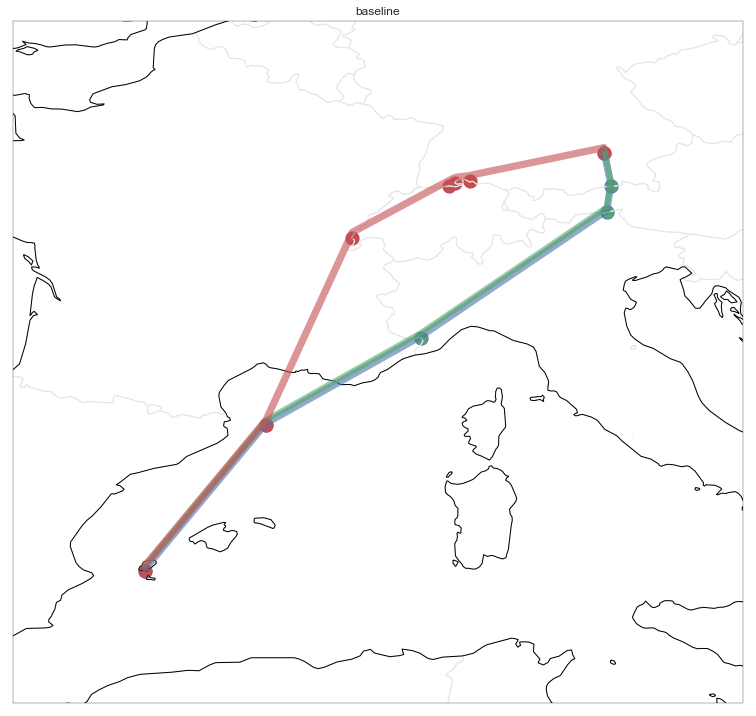

4486
4487
4488


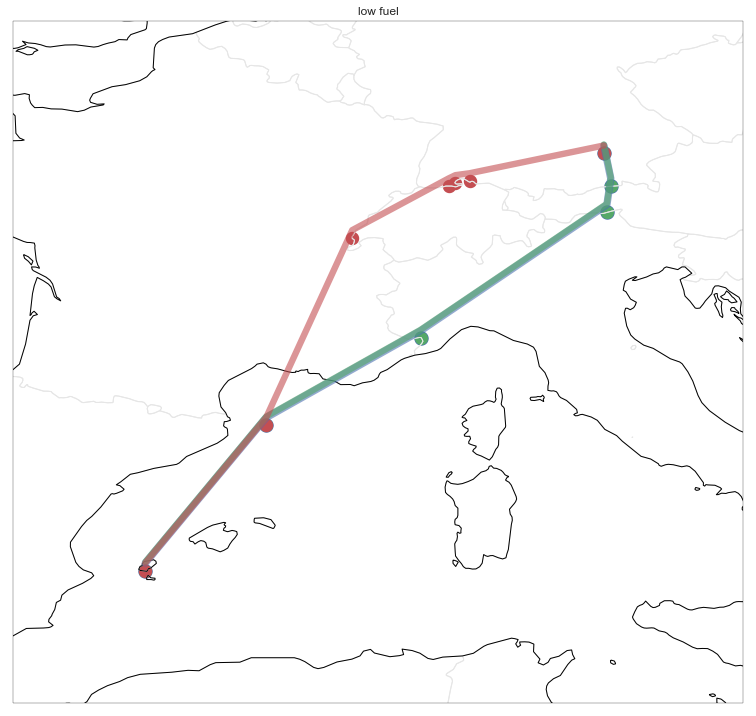

4486
4487
4488


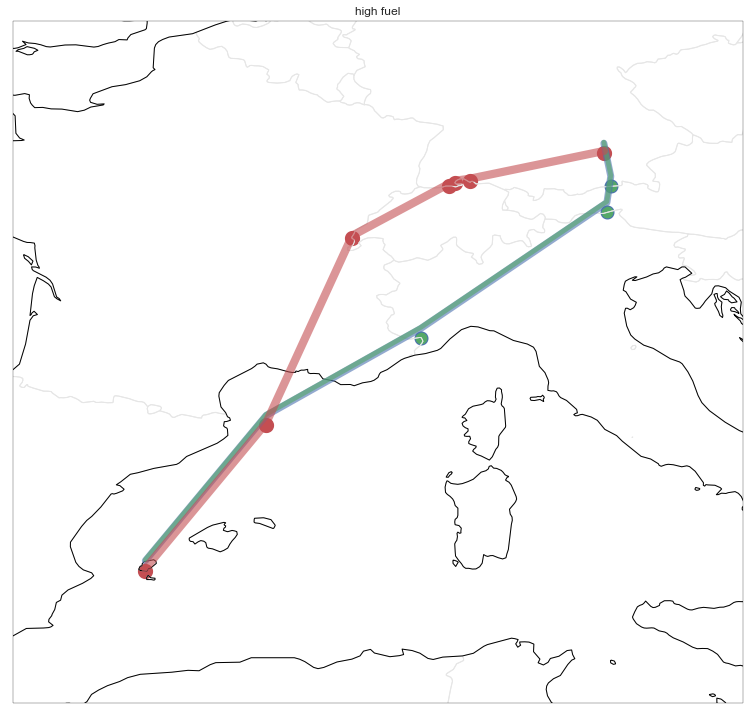

4486
4487
4488


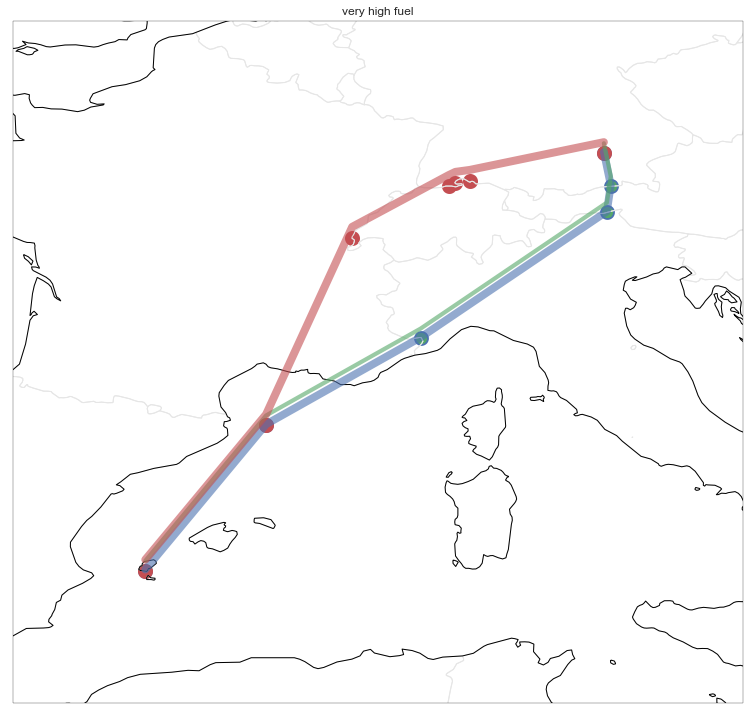

4486
4487
4488


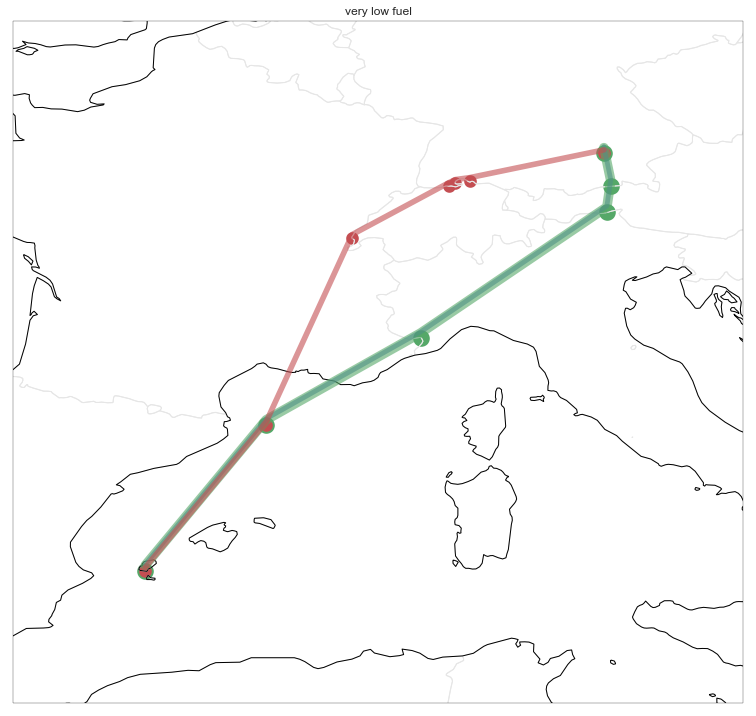

4486
4487
4488


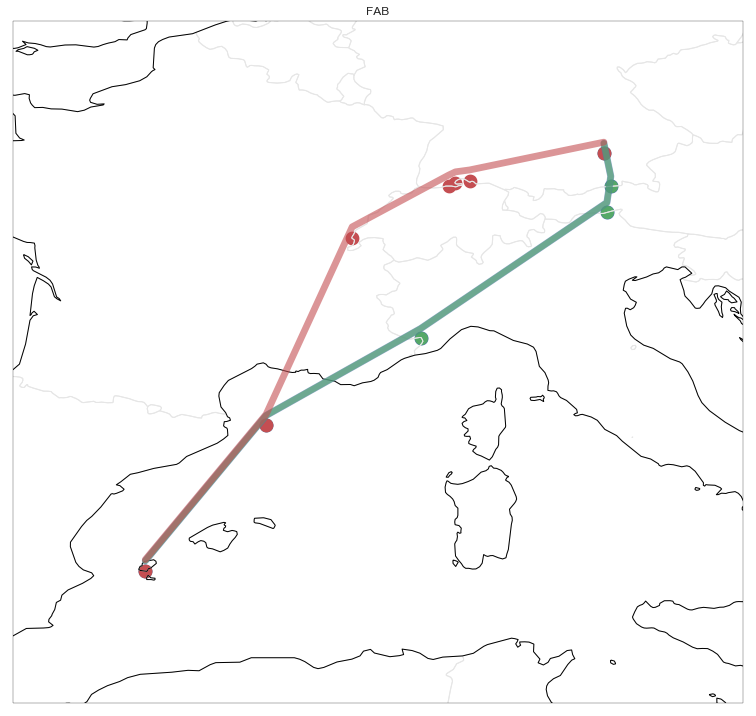

4486
4487
4488


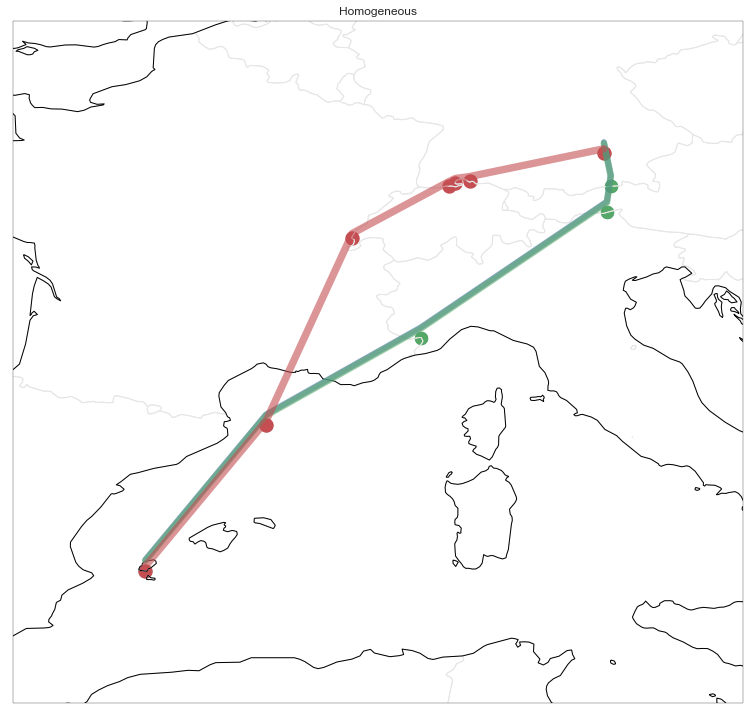

4486
4487
4488


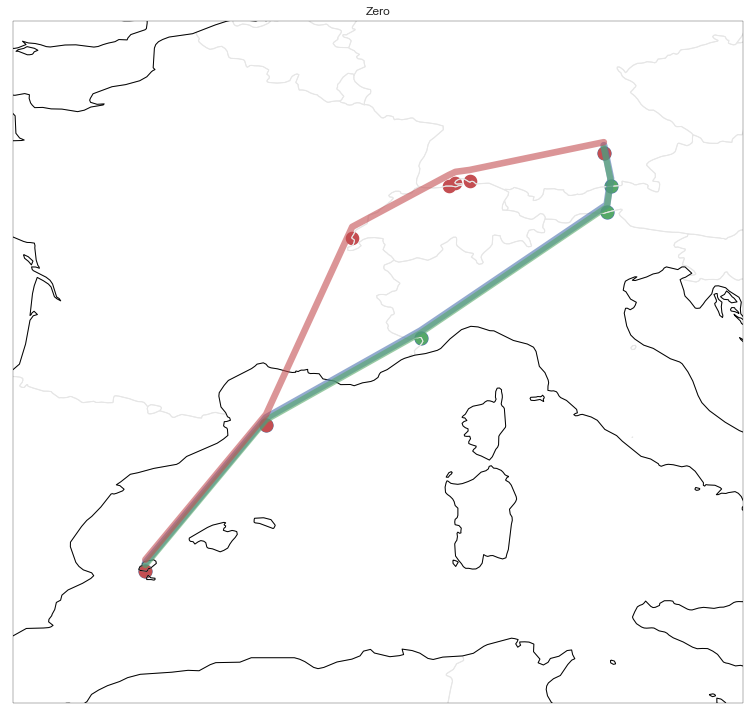

4486
4487
4488


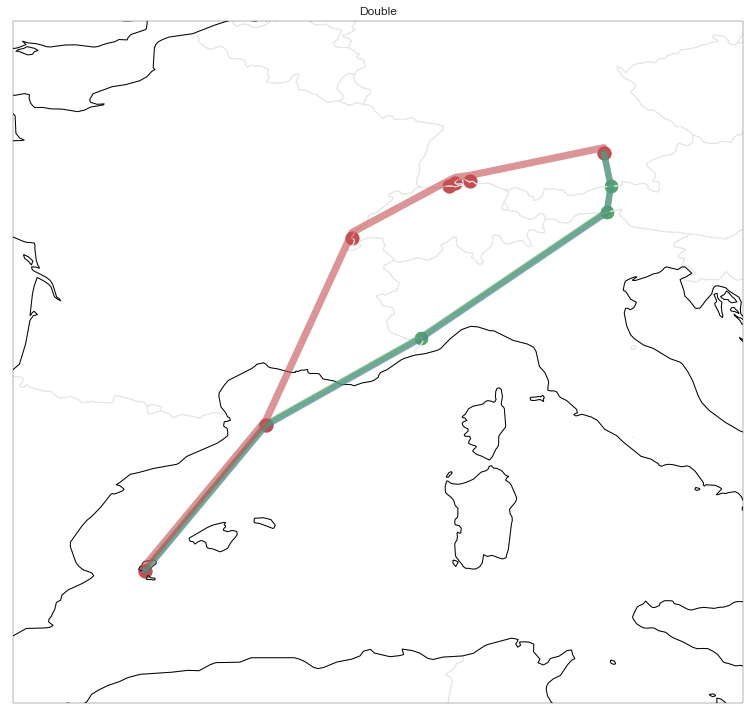

4486
4487
4488


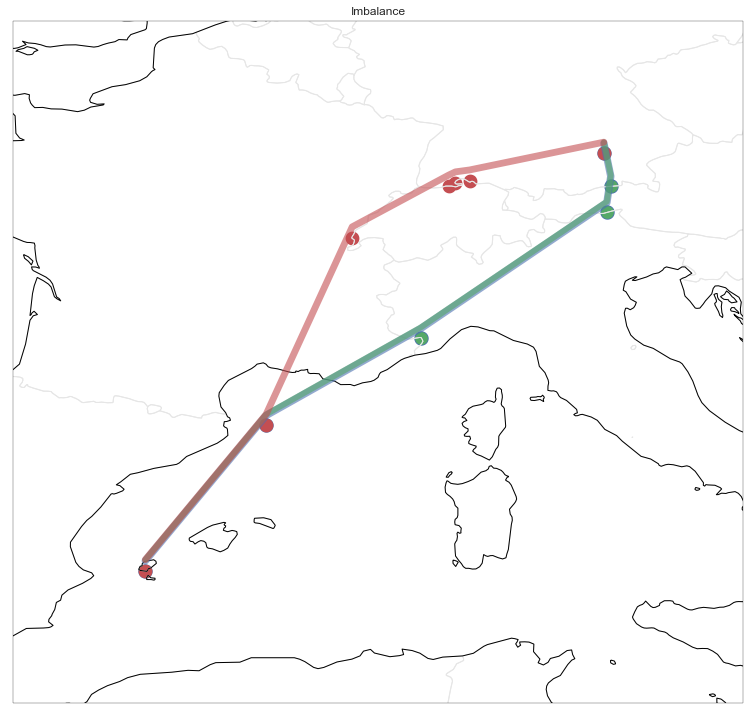

In [117]:
import cartopy.crs as ccrs
importlib.reload(mysql)

mysql_vista = mysql.DataAccessVista(hostname,port,username,password,database_vista)

def plot_usage_routes(icao_orig,icao_dest,scenario_id,title="",max_widht=20):

    d_f_p_route = mysql_vista.read_number_flights_per_route(scenario_id,icao_orig,icao_dest)
    d_f_p_route['per_flights_using']=d_f_p_route['num_flights_per_route']/d_f_p_route['num_flights_per_route'].sum()
    dict_usage = d_f_p_route.set_index('route_pool_id').to_dict()['per_flights_using']

    d_coords_route_pool = mysql_vista.read_coord_trajectory_route(icao_orig,icao_dest)

    unique_id = d_coords_route_pool['id'].drop_duplicates()

    min_lon = min(d_coords_route_pool['lon'])
    max_lon = max(d_coords_route_pool['lon'])
    min_lat = min(d_coords_route_pool['lat'])
    max_lat = max(d_coords_route_pool['lat'])

    scale = 5
    resolution = '50m'
    category = 'cultural'
    name = 'admin_0_countries'
    
    shpfilename = shapereader.natural_earth(resolution, category, name)
    # read the shapefile using geopandas
    df = geopandas.read_file(shpfilename)
    
    # read the European borders
    poly = df.loc[(df['CONTINENT'] == 'Europe') | 
                  ((df['CONTINENT']=="Africa") &
                   (df['SUBREGION']=="Northern Africa") | 
                  ((df['CONTINENT']=="Asia") &
                   (df['SUBREGION']=="Western Asia")))]['geometry']

    

    fig=plt.figure(figsize=(2.61538461538*scale, 3*scale))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([min_lon-3,max_lon+3,min_lat-3,max_lat+3],
                 crs=ccrs.PlateCarree())
    ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                      edgecolor='0.9')
    ax.coastlines(resolution='50m')

    
    
    

    for i in unique_id:
        lw=dict_usage.get(i,0)*20
        
        ax.plot(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lon'],
                     d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lat']+random.randint(0,10)/40, linewidth=lw,alpha=0.6,
                     transform=ccrs.Geodetic()
                     )
        
        print(i)
        #if i>9228:
        #    break
        


        ax.scatter(d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lon'],
                 d_coords_route_pool.loc[d_coords_route_pool['id']==i,'lat'], linewidth=lw,
                 transform=ccrs.Geodetic()
             )


    plt.title(title)
    plt.savefig("./"+icao_orig+"_"+icao_dest+"_"+title+"_routes.png",bbox_inches='tight')
    plt.show()


icao_orig="EGKK"
icao_dest="GCTS"
icao_orig="LFPG"
icao_dest="LTBA"

icao_orig="EGKK"
icao_dest="GCTS"



icao_orig="LEMD"
icao_dest="EDDB"


icao_orig="EGKK"
icao_dest="GCTS"

icao_orig="LGAV"
icao_dest="LFPG"

icao_orig="EGKK"
icao_dest="GCTS"

icao_orig="LEMD"
icao_dest="EDDB"
icao_orig="EDDB"
icao_dest="LIMC"
icao_orig="EGKK"
icao_dest="GCTS"
icao_orig="LFPG"
icao_dest="LTBA"
icao_orig="EG%"
icao_dest="GC%"
icao_orig="EGNT"
icao_dest="GCTS"
icao_orig="EGKK"
icao_dest="GCTS"
icao_orig="LFPG"
icao_dest="LIML"
icao_orig="LFPG"
icao_dest="LOWW"
icao_dest="EPWA"
icao_dest="LGAV"
icao_dest="LIRQ"
icao_orig="LEMD"
icao_dest="GCTS"
icao_dest="EFHK"
icao_orig="EDDM"
icao_dest="LEIB"

max_width=40
plot_usage_routes(icao_orig,icao_dest,0,'baseline',max_width)
plot_usage_routes(icao_orig,icao_dest,4,'low fuel',max_width)
plot_usage_routes(icao_orig,icao_dest,5, 'high fuel',max_width)
plot_usage_routes(icao_orig,icao_dest,28, 'very high fuel',max_width)
plot_usage_routes(icao_orig,icao_dest,29, 'very low fuel',max_width)
plot_usage_routes(icao_orig,icao_dest,6, 'FAB',max_width)
plot_usage_routes(icao_orig,icao_dest,7, 'Homogeneous',max_width)
plot_usage_routes(icao_orig,icao_dest,56, 'Zero',max_width)
plot_usage_routes(icao_orig,icao_dest,57, 'Double',max_width)
plot_usage_routes(icao_orig,icao_dest,58, 'Imbalance',max_width)



In [ ]:
importlib.reload(u)
importlib.reload(mysql)
mysql_vista = mysql.DataAccessVista(hostname,port,username,password,database_vista)

scenario_id=29
d_f_p_route = mysql_vista.read_number_flights_per_route(scenario_id,icao_orig,icao_dest,other_conditions="fps.FPS_run>=61")
d_f_p_route['per_flights_using']=20*d_f_p_route['num_flights_per_route']/d_f_p_route['num_flights_per_route'].sum()
dict_usage = d_f_p_route.set_index('route_pool_id').to_dict()['per_flights_using']

d_coords_route_pool = mysql_vista.read_coord_trajectory_route(icao_orig,icao_dest)

u.plot_trajectory_in_map(d_coords_route_pool,title="Test",scale=3, linewidth=1.5, linewidth_dict=dict_usage,
                         plot_markers=True, add_random=True)

In [90]:
icao_orig="LEMD"
icao_dest="EDDB"
icao_orig="EGKK"
icao_dest="GCTS"
icao_orig="LGAV"
icao_dest="LFPG"
scenario_id=29
d_f_p_route = mysql_vista.read_number_flights_per_route(scenario_id,icao_orig,icao_dest)
d_f_p_route['per_flights_using']=100*d_f_p_route['num_flights_per_route']/d_f_p_route['num_flights_per_route'].sum()

d_f_p_route

,route_pool_id,num_flights_per_route,per_flights_using
0,31659,24,8.000000
1,31660,28,9.333333
2,31661,32,10.666667
3,31662,25,8.333333
4,31663,28,9.333333
5,31664,30,10.000000
6,31665,35,11.666667
7,31666,29,9.666667
8,31667,25,8.333333
9,31668,22,7.333333


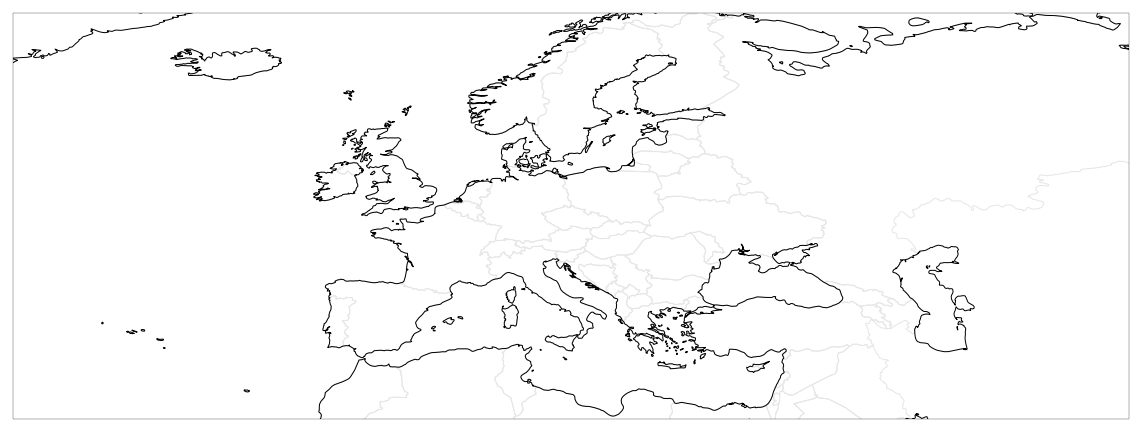

In [83]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
resolution = '50m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# read the german borders
poly = df.loc[(df['CONTINENT'] == 'Europe') | 
              ((df['CONTINENT']=="Africa") &
               (df['SUBREGION']=="Northern Africa") | 
              ((df['CONTINENT']=="Asia") &
               (df['SUBREGION']=="Western Asia")))]['geometry']#.values[0]


fig=plt.figure(figsize=(20, 15))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.9')

ax.coastlines(resolution='50m')

ax.set_extent([-40, 70, 30, 70], crs=ccrs.PlateCarree())

plt.show()

In [ ]:
df.columns

In [ ]:
df.loc[(df['CONTINENT']=="Europe"),['TYPE']]
df.loc[(df['CONTINENT']=="Asia"),['SUBREGION']].drop_duplicates()


## REVENUE METRICS PER NAS

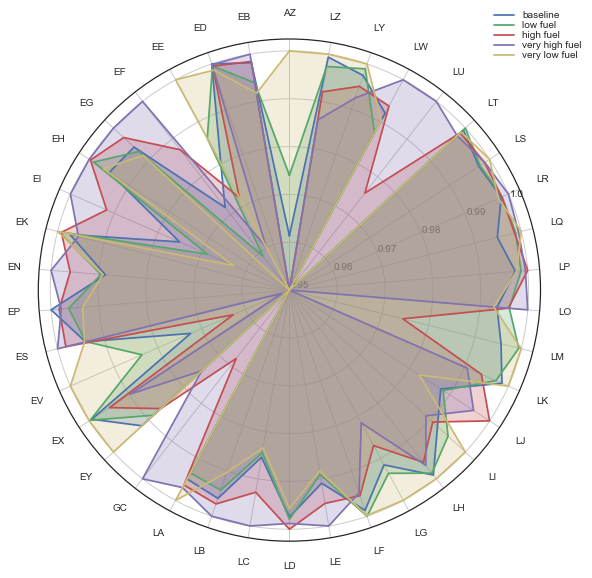

In [191]:
def revenues_per_NAS_scenario(scenario_id,scenario_name,other_conditions):
    drev, drev_avg=mysql_vista.read_revenue_per_NAS(scenario_id,other_condition)
    
    drev_avg=drev_avg.T
    drev_avg.columns = drev_avg.iloc[0]
    drev_avg=drev_avg.reindex(drev_avg.index.drop('nas_sid'))
    drev_avg.rename(columns={'index':'scenario'})
    drev_avg['scenario']=scenario_name
    drev_avg.reset_index(inplace=True)


    return drev_avg
    
    
other_condition=None
drev = revenues_per_NAS_scenario(0,'baseline',other_condition).append(
       revenues_per_NAS_scenario(4,'low fuel',other_condition).append(
       revenues_per_NAS_scenario(5,'high fuel',other_condition).append(
       revenues_per_NAS_scenario(28,'very high fuel',other_condition).append(
       revenues_per_NAS_scenario(29,'very low fuel',other_condition))))).drop(["index"],axis=1)
           


filter_col = [x for x in drev.columns if (not x.startswith('O')) and (not x.startswith('U')) 
              and (not x.startswith('D')) and (not x.startswith('B')) and (not x.startswith('G'))
              and (not x.startswith('H')) and (len(x)>1) or x=="GC"]

#u.plot_results_radial(d[['scenario','LE','EG','AZ','LF','LP']],case_column="scenario",vmin=0.9)
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.95)

In [194]:
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.8,fig_path='./revenues_per_NAS_fuel.png')

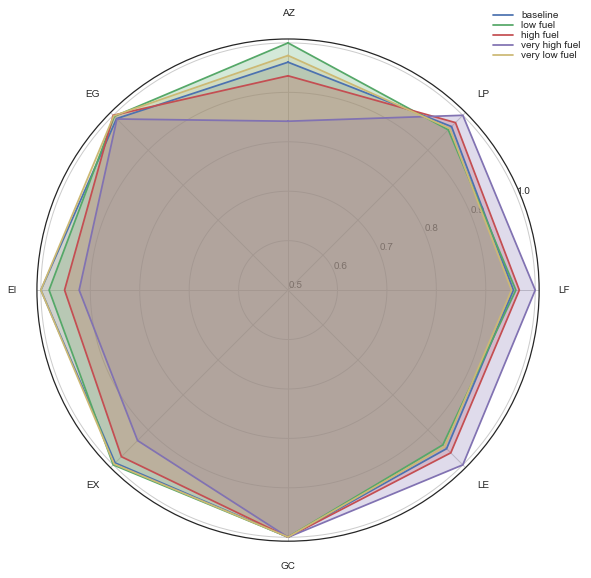

In [188]:

other_condition="fo.icao_orig=\"LFPG\" AND fo.icao_dest=\"LGAV\""

other_condition="fo.icao_orig=\"EGKK\" AND fo.icao_dest=\"GCTS\""
other_condition="fo.icao_orig like \"EG%\" AND fo.icao_dest like \"GC%\""
drev = revenues_per_NAS_scenario(0,'baseline',other_condition).append(
       revenues_per_NAS_scenario(4,'low fuel',other_condition).append(
       revenues_per_NAS_scenario(5,'high fuel',other_condition).append(
       revenues_per_NAS_scenario(28,'very high fuel',other_condition).append(
       revenues_per_NAS_scenario(29,'very low fuel',other_condition))))).drop(["index"],axis=1)
           


filter_col = [x for x in drev.columns if (not x.startswith('O')) and (not x.startswith('U')) 
              and (not x.startswith('D')) and (not x.startswith('B')) and (not x.startswith('G'))
              and (not x.startswith('H')) and (len(x)>1) or x=="GC"]

#u.plot_results_radial(d[['scenario','LE','EG','AZ','LF','LP']],case_column="scenario",vmin=0.9)
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.5)

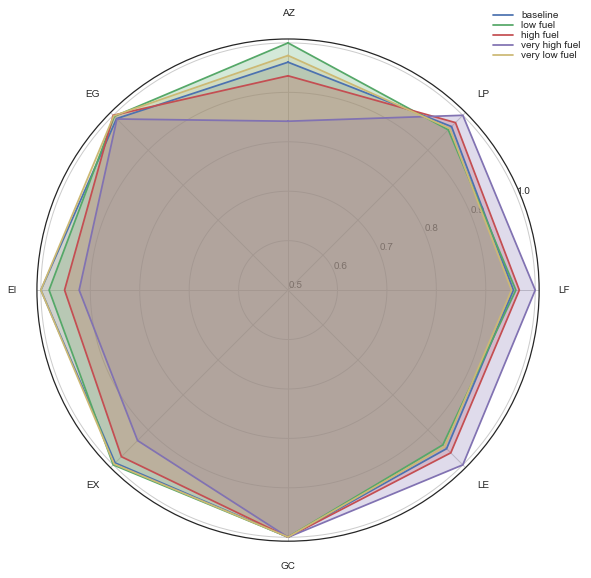

In [189]:
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.5,fig_path="./revenue_change_fuel_EG_GC_05.png")
plt.show()

In [120]:

#u.plot_results_radial(d[['scenario','LE','EG','AZ','LF','LP']],case_column="scenario",vmin=0.9)
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.90,fig_path='./revenues_per_NAS_fuel.png')

In [ ]:
importlib.reload(u)
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.80)

In [ ]:
drev

## DEMAND IN NAS

In [148]:
importlib.reload(mysql)
mysql_vista = mysql.DataAccessVista(hostname,port,username,password,database_vista)

def demand_airspace(scenario,scenario_name,other_condition):
    d_a=mysql_vista.read_airspace_entry_on_selection(scenario,other_condition=other_condition)
    demand=d_a.groupby("nas_sid",as_index=False)['fp_option_id'].count().T
    demand.columns = demand.iloc[0]
    demand=demand.reindex(demand.index.drop('nas_sid'))
    demand.rename(columns={'index':'scenario'})
    demand['scenario']=scenario_name
    demand.reset_index(drop=True,inplace=True)
    return demand

  

In [154]:
demand_0 = demand_airspace(0,"baseline",other_condition="fpo.icao_orig=\"EGKK\" AND fpo.icao_dest=\"GCTS\"")
demand_4 = demand_airspace(4,"low fuel",other_condition="fpo.icao_orig=\"EGKK\" AND fpo.icao_dest=\"GCTS\"")
demand_5 = demand_airspace(5,"high fuel",other_condition="fpo.icao_orig=\"EGKK\" AND fpo.icao_dest=\"GCTS\"")
demand_28 = demand_airspace(28,"very high fuel",other_condition="fpo.icao_orig=\"EGKK\" AND fpo.icao_dest=\"GCTS\"")
demand_29 = demand_airspace(29,"very low fuel",other_condition="fpo.icao_orig=\"EGKK\" AND fpo.icao_dest=\"GCTS\"")
  
demand = demand_0.append(demand_4).append(demand_5).append(demand_28).append(demand_29)
u.plot_results_radial(demand,case_column="scenario",vmin=0.5,fig_path="./demand_variation_EGKK_GCTS.png")

In [155]:
demand_0 = demand_airspace(0,"baseline",other_condition="fpo.icao_orig like \"EG%\" AND fpo.icao_dest like \"GC%\"")
demand_4 = demand_airspace(4,"low fuel",other_condition="fpo.icao_orig like \"EG%\" AND fpo.icao_dest like \"GC%\"")
demand_5 = demand_airspace(5,"high fuel",other_condition="fpo.icao_orig like \"EG%\" AND fpo.icao_dest like \"GC%\"")
demand_28 = demand_airspace(28,"very high fuel",other_condition="fpo.icao_orig like \"EG%\" AND fpo.icao_dest like \"GC%\"")
demand_29 = demand_airspace(29,"very low fuel",other_condition="fpo.icao_orig like \"EG%\" AND fpo.icao_dest like \"GC%\"")
demand = demand_0.append(demand_4).append(demand_5).append(demand_28).append(demand_29)
u.plot_results_radial(demand,case_column="scenario",vmin=0.5,fig_path="./demand_variation_EG_GC_05.png") 

In [165]:
demand_0 = demand_airspace(0,"baseline",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_4 = demand_airspace(4,"low fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_5 = demand_airspace(5,"high fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_28 = demand_airspace(28,"very high fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_29 = demand_airspace(29,"very low fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
  
demand = demand_0.append(demand_4).append(demand_5).append(demand_28).append(demand_29)


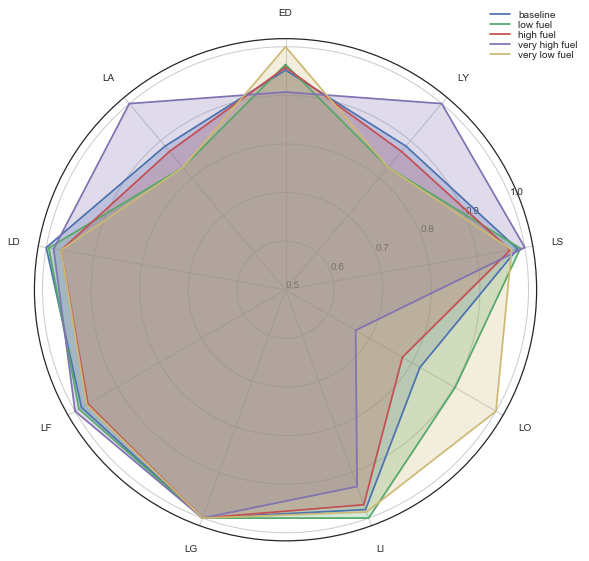

In [167]:
u.plot_results_radial(demand,case_column="scenario",vmin=0.5,fig_path="./demand_variation_LFPG_LGAV_fuel.png")
plt.show()

In [168]:
demand_0 = demand_airspace(0,"baseline",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_6 = demand_airspace(6,"FABs",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_7 = demand_airspace(7,"Homogeneous",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_56 = demand_airspace(56,"Zero",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_57 = demand_airspace(57,"Double",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_58 = demand_airspace(58,"Imbalance",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
  
demand = demand_0.append(demand_6).append(demand_7).append(demand_56).append(demand_57).append(demand_58)


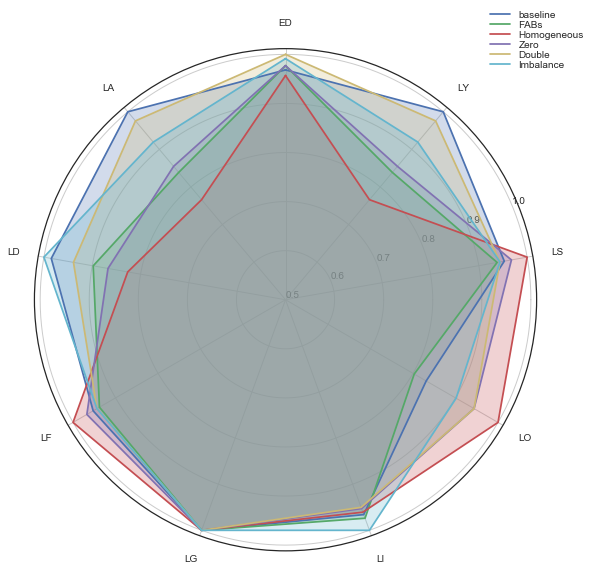

In [176]:
u.plot_results_radial(demand,case_column="scenario",vmin=0.5,fig_path="./demand_variation_LFPG_LGAV_crco.png")
plt.show()

In [177]:
demand_0 = demand_airspace(0,"baseline",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_6 = demand_airspace(6,"FABs",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_7 = demand_airspace(7,"Homogeneous",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_24 = demand_airspace(24,"FABs low fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_25 = demand_airspace(25,"Homogeneous low fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_26 = demand_airspace(26,"FABs high fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
demand_27 = demand_airspace(27,"Homogeneous high fuel",other_condition="fpo.icao_orig=\"LFPG\" AND fpo.icao_dest=\"LGAV\"")
  
demand = demand_0.append(demand_6).append(demand_7).append(demand_24).append(demand_25).append(demand_26).append(demand_27)


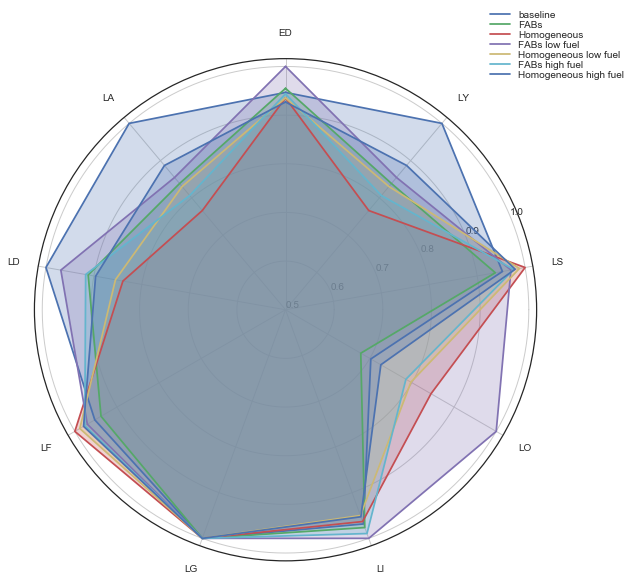

In [179]:
u.plot_results_radial(demand,case_column="scenario",vmin=0.5,fig_path="./demand_variation_LFPG_LGAV_crco_and_fuel.png")
plt.show()

In [127]:
plot_usage_routes(icao_orig,icao_dest,28, 'very high fuel',max_width)
plot_usage_routes(icao_orig,icao_dest,29, 'very low fuel',max_width)
plot_usage_routes(icao_orig,icao_dest,6, 'FAB',max_width)
plot_usage_routes(icao_orig,icao_dest,7, 'Homogeneous',max_width)
plot_usage_routes(icao_orig,icao_dest,56, 'Zero',max_width)
plot_usage_routes(icao_orig,icao_dest,57, 'Double',max_width)
plot_usage_routes(icao_orig,icao_dest,58, 'Imbalance',max_width)

nas_sid,index,AZ,EG,EX,GC,GM,LE,LF,LP,scenario
0,fp_option_id,242,500,242,500,130,335,335,500,baseline


## OTHER - OLD

In [ ]:
import sys
sys.path.insert(1,'../../../../libs')
sys.path.insert(1,'../py')
import importlib

import fp_generator_functions as fgf
importlib.reload(mysql)
importlib.reload(fgf)
importlib.reload(u)

for i in range(0,10):
    print(i)
    fp_o= fgf.flight_plan_option_selection(hostname,port,username,password,database_vista,scenario_id = 6,FPG_run=14)

print("Done")

In [ ]:
fs_old = fs.copy()

In [ ]:
fs = mysql_vista.read_flights_selected(other_condition="fo.FPG_run>=11",only_first_preference=True)

In [ ]:
foptions = mysql_vista.read_number_options_per_schedule()

In [ ]:
foptions.head()

In [ ]:
fs = pd.merge(fs, foptions, on="schedule_id", how="left")

In [ ]:
fs.columns

In [ ]:
fs[['scenario','FPO_run']].drop_duplicates()

In [ ]:
importlib.reload(u)
def dataframe_results(df,case):
    dfresults = pd.DataFrame([{'case':case,
                    'buffer min':df['schedule_buffer_min'].mean(),
                    'avg dist nm': df['fp_distance_nm'].mean(),
                    'total dist nm': df['fp_distance_nm'].sum()/1000000,
                    'avg crco': df['crco_cost_EUR'].mean(),
                    'total crco M EUR':df['crco_cost_EUR'].sum()/1000000,
                    'avg time min': df['fp_min'].mean(),
                    'total time M min': df['fp_min'].sum()/1000000,
                    'avg fuel kg': df['fp_fuel_kg'].mean()}])
    
    return dfresults



df=dataframe_results(fs.loc[(fs['scenario']==0) & (fs['num_options']==1)],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & (fs['num_options']==1)],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & (fs['num_options']==1)],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','only 1 option')

#u.plot_results_radial(df,'case',vmin=0.95)



df=dataframe_results(fs.loc[(fs['scenario']==0) & (fs['num_options']>1)],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & (fs['num_options']>1)],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & (fs['num_options']>1)],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','more that 1 option')

#u.plot_results_radial(df,'case',vmin=0.95)



df=dataframe_results(fs.loc[(fs['scenario']==0) & (fs['num_options']>5)],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & (fs['num_options']>5)],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & (fs['num_options']>5)],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case','more than 5 options')


#u.plot_results_radial(df,'case',vmin=0.95)





df=dataframe_results(fs.loc[fs['scenario']==0],'baseline').append(
             dataframe_results(fs.loc[fs['scenario']==4],'low fuel').append(
             dataframe_results(fs.loc[fs['scenario']==5],'high fuel')))

u.plot_results_line(df,'case')


df=dataframe_results(fs.loc[fs['scenario']==0],'baseline').append(
             dataframe_results(fs.loc[fs['scenario']==6],'FABs'))

u.plot_results_line(df,'case')

#u.plot_results_radial(df,'case',vmin=0.95)




#u.plot_results_radial(df,'case',vmin=0.95)



#df = dataframe_results(fp_sched_fnom,'baseline').append(
#             dataframe_results(fp_sched_fcrcohigh,'crco high'))
#u.plot_results_line(df,'case')

print("A")

In [ ]:

orig="EN"
dest="LE"

orig="EGKK"
dest="GCTS"

orig=""
dest=""

orig="EGKK"
dest="GCTS"

'''
df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case',orig+"_"+dest)




df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==7) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'homo').append(
             dataframe_results(fs.loc[(fs['scenario']==25) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'homo low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==27) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'homo high fuel'))))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case',orig+"_"+dest)

'''

orig="E"
dest="G"

df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==4) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'low fuel').append(
             dataframe_results(fs.loc[(fs['scenario']==5) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'high fuel')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case',orig+"_"+dest)

'''

df=dataframe_results(fs.loc[(fs['scenario']==0) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'baseline').append(
             dataframe_results(fs.loc[(fs['scenario']==7) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'homo').append(
             dataframe_results(fs.loc[(fs['scenario']==6) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))],'FAB')))

u.plot_results_line(df[['case','buffer min','avg dist nm','avg crco', 'avg time min', 'avg fuel kg']],'case',orig+"_"+dest)
'''

print("A")

In [ ]:
drev_0, num_runs_0=mysql_vista.read_revenue_per_NAS(scenario_id=0,other_condition="fo.FPG_run>=11")



In [ ]:
drev_4, drev_4_avg=mysql_vista.read_revenue_per_NAS(scenario_id=4,other_condition="fo.FPG_run>=11")

In [ ]:
drev_5, drev_5_avg=mysql_vista.read_revenue_per_NAS(scenario_id=5,other_condition="fo.FPG_run>=11")

In [ ]:
rev_0=drev_0.T
rev_0.columns = rev_0.iloc[0]
rev_0=rev_0.reindex(rev_0.index.drop('nas_sid'))
rev_0.rename(columns={'index':'scenario'})
rev_0['scenario']="baseline"
rev_0.reset_index(inplace=True)

rev_4=drev_4.T
rev_4.columns = rev_4.iloc[0]
rev_4=rev_4.reindex(rev_4.index.drop('nas_sid'))
rev_4.rename(columns={'index':'scenario'})
rev_4['scenario']="low fuel"
rev_4.reset_index(inplace=True)

rev_5=drev_5.T
rev_5.columns = rev_5.iloc[0]
rev_5=rev_5.reindex(rev_5.index.drop('nas_sid'))
rev_5.rename(columns={'index':'scenario'})
rev_5['scenario']="high fuel"
rev_5.reset_index(inplace=True)



In [ ]:
drev_0, num_runs_0=mysql_vista.read_revenue_per_NAS(scenario_id=0,other_condition="fo.FPG_run>=11")
importlib.reload(u)
drev=rev_0.append(rev_4).append(rev_5).drop(["index"],axis=1)
filter_col = [x for x in drev.columns if (not x.startswith('O')) and (not x.startswith('U')) 
              and (not x.startswith('D')) and (not x.startswith('B')) and (not x.startswith('G'))
              and (not x.startswith('H')) and (len(x)>1) or x=="GC"]

#u.plot_results_radial(d[['scenario','LE','EG','AZ','LF','LP']],case_column="scenario",vmin=0.9)
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.95)

In [ ]:
importlib.reload(u)
drev=rev_0.append(rev_4).append(rev_5).drop(["index"],axis=1)
filter_col = [x for x in drev.columns if (not x.startswith('O')) and (not x.startswith('U')) 
              and (not x.startswith('D')) and (not x.startswith('B')) and (not x.startswith('G'))
              and (not x.startswith('H')) and (len(x)>1) or x=="GC"]

#u.plot_results_radial(d[['scenario','LE','EG','AZ','LF','LP']],case_column="scenario",vmin=0.9)
u.plot_results_radial(drev[filter_col],case_column="scenario",vmin=0.95)

In [ ]:
drev_4.head()

In [ ]:
num_runs_0.loc[0].item()

In [ ]:
drev_0_avg = drev_0.copy()
drev_0_avg['crco_kEUR']=drev_0_avg['crco_kEUR'].apply(lambda x: x/num_runs_0.loc[0].item())
drev_0_avg.head()

In [ ]:
t=fs.loc[(fs['scenario']==6) & 
                            (fs['icao_orig'].str.startswith(orig)) &
                            (fs['icao_dest'].str.startswith(dest))]

In [ ]:
doc=[31147.5,
29284.89,
24990.420000000002,
26545.96,
30156.62,
29443.96,
30245.23,
28772.67,
32318.649999999998,
29253.239999999998,
29687.78,
28195.3,
28534.91,
29045.15,
34186.4,
31433.36,
32232.489999999998,
27265.43]
print(doc)
print(np.round(100*u.intensity_function(doc,2000),2))

doc=[14075.699999999999,
12810.96,
12820.32,
14982.23,
14658.82,
14599.31,
14840.75]
print(doc)
print(np.round(100*u.intensity_function(doc,2000),2))


In [ ]:
df

In [ ]:
fs.loc[(fs['scenario']==5) & (fs['num_options']==1)]['schedule_buffer_min'].mean()

In [ ]:
fs.loc[(fs['scenario']==0) & (fs['num_options']==1)]['schedule_buffer_min'].mean()

In [ ]:
fs.loc[(fs['scenario']==4) & (fs['num_options']==1)]['schedule_buffer_min'].mean()

In [ ]:
len(fs.loc[(fs['scenario']==0) & (fs['num_options']==4)]['schedule_buffer_min'])

In [ ]:
len(fs.loc[(fs['scenario']==0) & (fs['num_options']==1)]['schedule_buffer_min'])

In [ ]:
'''
f=plt.figure(figsize=(200,10))


fs.loc[((fs['scenario']==0) & (fs['schedule_buffer_min']>-50)
       & (fs['schedule_buffer_min']<120)),['schedule_buffer_min']].hist(alpha=0.5, bins=100, axes=f.get_axes())#figsize=(20,10))
fs.loc[((fs['scenario']==4) & (fs['schedule_buffer_min']>-50)
       & (fs['schedule_buffer_min']<120)),['schedule_buffer_min']].hist(alpha=0.5, bins=100)
fs.loc[((fs['scenario']==5) & (fs['schedule_buffer_min']>-50)
       & (fs['schedule_buffer_min']<120)),['schedule_buffer_min']].hist(alpha=0.5, bins=100)
'''
#fs.hist(column='schedule_buffer_min', bins=100, by='scenario', sharex=True, sharey=True)
'''
#fs.loc[(fs['scenario']==4,'schedule_buffer_min'].hist(alpha=0.5, bins=100)
#fs.loc[(fs['scenario']==5,'schedule_buffer_min'].hist(alpha=0.5, bins=100)
#plt.figure(figsize=(20,100))
#plt.gcf().clear()

'''
#plt.show()

min_buffer=-30
max_buffer=100

f=plt.figure(figsize=(20,10))


#count, division = np.histogram(fs.loc[((fs['scenario']==0) & (fs['schedule_buffer_min']>min_buffer)
#       & (fs['schedule_buffer_min']<max_buffer)),['schedule_buffer_min']],bins=100)

plt.hist(fs.loc[((fs['scenario']==0) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),'schedule_buffer_min'])

plt.hist(fs.loc[((fs['scenario']==4) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),'schedule_buffer_min'],bins=100,alpha=0.5)


#plt.plot([(a+b)/2 for a, b in zip(division, division[1:])],count/sum(count))

count, division = np.histogram(fs.loc[((fs['scenario']==4) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),['schedule_buffer_min']],bins=100)
#plt.plot([(a+b)/2 for a, b in zip(division, division[1:])],count/sum(count))

count, division = np.histogram(fs.loc[((fs['scenario']==5) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),['schedule_buffer_min']],bins=100)
#plt.plot([(a+b)/2 for a, b in zip(division, division[1:])],count/sum(count))

#plt.legend(['a','b','c'])

plt.show()




In [ ]:
min_buffer=-30
max_buffer=100

A = fs.loc[((fs['scenario']==0) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),'schedule_buffer_min'].tolist()

B = fs.loc[((fs['scenario']==4) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),'schedule_buffer_min'].tolist()

C = fs.loc[((fs['scenario']==5) & (fs['schedule_buffer_min']>min_buffer)
       & (fs['schedule_buffer_min']<max_buffer)),'schedule_buffer_min'].tolist()


fig=plt.figure(figsize=(20,10))
#ax = plt.axes()
#plt.hold(True)

# first boxplot pair
bp = plt.boxplot(A, positions = [1], widths = 0.6)
#plt.setBoxColors(bp)

# second boxplot pair
bp = plt.boxplot(B, positions = [2], widths = 0.6)
#setBoxColors(bp)

# thrid boxplot pair
bp = plt.boxplot(C, positions = [3], widths = 0.6)
#setBoxColors(bp)

'''
# set axes limits and labels
xlim(0,9)
ylim(0,9)
ax.set_xticklabels(['A', 'B', 'C'])
ax.set_xticks([1.5, 4.5, 7.5])

# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
legend((hB, hR),('Apples', 'Oranges'))
hB.set_visible(False)
hR.set_visible(False)

savefig('boxcompare.png')
'''
plt.show()


In [ ]:
count, division = np.histogram(fs['schedule_buffer_min'],bins=100)


In [ ]:

len([(a+b)/2 for a, b in zip(division, division[1:])])

In [ ]:

plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 5000)
data = np.vstack([x, y]).T
bins = np.linspace(-10, 10, 30)

plt.hist(data, bins, alpha=0.7, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
fp_schedules=mysql_vista.read_historical_schedules_with_block_time()

In [ ]:
fp_options=mysql_vista.read_fp_options()#"WHERE fp_generator_run=2")

In [ ]:
fp_options['fp_generator_run'].drop_duplicates()

In [ ]:
fp_options_clean=fp_options[~fp_options['tow'].isnull()]
fp_options_clean.reset_index(drop=True)
print(len(fp_options))
print(len(fp_options_clean))

In [ ]:
fp_options_clean.columns

In [ ]:
def apply_fuel_crco_cost(dfp,fuel_cost,crco=1):
    fp = dfp.copy()
    fp['fuel_cost'] = fp['fp_fuel_kg'] * fuel_cost
    fp['crco_cost'] = fp['crco_cost'] *crco
    fp['doc'] = fp['fuel_cost'] + fp['crco_cost']
    return fp


fp_fnom = apply_fuel_crco_cost(fp_options_clean,0.5)
fp_flow = apply_fuel_crco_cost(fp_options_clean,0.1)
fp_fhigh = apply_fuel_crco_cost(fp_options_clean,1)
fp_fvhigh = apply_fuel_crco_cost(fp_options_clean,2)
fp_crcohigh = apply_fuel_crco_cost(fp_options_clean,0.5,2)



In [ ]:
def intensity_function(cs):
        smoothness_fp=1000
        if len(cs)>1:
            st = np.exp(-(np.array(cs)-min(cs))/smoothness_fp)
            ints = st/st.sum()
        else:
            ints = np.array([1.])
        return ints
    
def choose_option(cs):
    ints=intensity_function(cs)
    sel=ints==np.random.choice(ints,1,p=ints)
    
    return sel

def select_flights(df):
    df['selected'] = df.groupby(['schedule_id','fp_generator_run'])['doc'].transform(choose_option)
    df_selected = df.loc[df['selected']==1]
    return df_selected

fp_sel_fnom = select_flights(fp_fnom)
fp_sel_flow = select_flights(fp_flow)
fp_sel_fhigh = select_flights(fp_fhigh)
fp_sel_fvhigh = select_flights(fp_fvhigh)
fp_sel_fcrcohigh = select_flights(fp_crcohigh)
    
    
#fp_options_clean['prob_selected']=fp_options_clean.groupby(['schedule_id','fp_generator_run'])['doc'].transform(intensity_function)


In [ ]:
len(fp_sel_fnom)

In [ ]:
def add_schedules_compute_buffer(df, ds):
    df = pd.merge(df, ds, left_on="schedule_id", right_on="nid", how="inner", suffixes=("_fp","_s"))
    df['buffer'] = df['block_time']-df['fp_min']
    return df

fp_sched_fnom = add_schedules_compute_buffer(fp_sel_fnom,fp_schedules)
fp_sched_flow = add_schedules_compute_buffer(fp_sel_flow,fp_schedules)
fp_sched_fhigh = add_schedules_compute_buffer(fp_sel_fhigh,fp_schedules)
fp_sched_fvhigh = add_schedules_compute_buffer(fp_sel_fvhigh,fp_schedules)
fp_sched_fcrcohigh = add_schedules_compute_buffer(fp_sel_fcrcohigh,fp_schedules)


In [ ]:
df=pd.merge(pd.merge(pd.merge(fp_sched_fnom.groupby('fp_generator_run', as_index=False)['buffer'].mean(),
fp_sched_fnom.groupby('fp_generator_run', as_index=False)['fp_distance_nm'].mean(), on="fp_generator_run"),
fp_sched_fnom.groupby('fp_generator_run', as_index=False)['crco_cost'].mean(), on="fp_generator_run"),
(fp_sched_fnom.groupby('fp_generator_run', as_index=False)['crco_cost'].sum()).rename(columns={'crco_cost': 'total crco M EUR'}),
on="fp_generator_run")
df['total crco M EUR']=df['total crco M EUR']/1000000

u.plot_results_line(df,'fp_generator_run')

In [ ]:
importlib.reload(u)

def dataframe_results(df,case):
    dfresults = pd.DataFrame([{'case':case,'buffer':df['buffer'].mean(),
                    'avg dist nm': df['fp_distance_nm'].mean(),
                    'total dist nm': df['fp_distance_nm'].sum()/1000000,
                    'avg crco': df['crco_cost'].mean(),
                    'total crco M EUR':df['crco_cost'].sum()/1000000,
                    'avg time min': df['fp_min'].mean(),
                    'total time M min': df['fp_min'].sum()/1000000,
                    'avg fuel kg': df['fp_fuel_kg'].mean()}])
    
    return dfresults

fp_sched_fnom = add_schedules_compute_buffer(fp_sel_fnom,fp_schedules)
fp_sched_flow = add_schedules_compute_buffer(fp_sel_flow,fp_schedules)
fp_sched_fhigh = add_schedules_compute_buffer(fp_sel_fhigh,fp_schedules)
fp_sched_fvhigh = add_schedules_compute_buffer(fp_sel_fvhigh,fp_schedules)
fp_sched_fcrcohigh = add_schedules_compute_buffer(fp_sel_fcrcohigh,fp_schedules)


df=dataframe_results(fp_sched_fnom,'baseline').append(
             dataframe_results(fp_sched_flow,'low fuel').append(
             dataframe_results(fp_sched_fhigh,'high fuel').append(
             dataframe_results(fp_sched_fvhigh,'very high fuel'))))

u.plot_results_line(df,'case')

u.plot_results_radial(df,'case',vmin=0.9)


df = dataframe_results(fp_sched_fnom,'baseline').append(
             dataframe_results(fp_sched_fcrcohigh,'crco high'))
u.plot_results_line(df,'case')

In [ ]:
df

In [ ]:
importlib.reload(u)

u.plot_results_radial(df,'case')

df

In [ ]:
fp_opt_sel_schedule['buffer'].mean()

In [ ]:
df.head()

In [ ]:
df = pd.DataFrame([{'case':'scenario 1','buffer':22.5,'crco':1367,'distance':3526,'other':34},
                   {'case':'scenario 2','buffer':26.6,'crco':1561,'distance':1363,'other':63}])

In [ ]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data



N = 9
theta = radar_factory(N, frame='polygon')

data = example_data()
spoke_labels = data.pop(0)

fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axes.flatten(), data):
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)
    ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
ax = axes[0, 0]
labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')

fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
         horizontalalignment='center', color='black', weight='bold',
         size='large')

plt.show()

In [ ]:
df

In [ ]:
df2 = df.drop('case',axis=1).copy()


In [ ]:
df2['buffer']=df2['buffer']/df2['buffer'].max()
df2['avg crco']=df2['avg crco']/df2['avg crco'].max()
df2['avg dist nm']=df2['avg dist nm']/df2['avg dist nm'].max()
df2['avg fuel kg']=df2['avg fuel kg']/df2['avg fuel kg'].max()
df2['avg time min']=df2['avg time min']/df2['avg time min'].max()
df2['total dist nm']=df2['total dist nm']/df2['total dist nm'].max()
df2['total crco M EUR']=df2['total crco M EUR']/df2['total crco M EUR'].max()
df2['total time M min']=df2['total time M min']/df2['total time M min'].max()

df2

In [ ]:
(df2-0.2)/(1-0.2)

In [ ]:
#theta[-1]%(2*np.pi)
theta

In [ ]:
vmin=0.2

def 
df3 = (df2-vmin)/(1-vmin)
df3 = df3.drop('total dist nm', axis=1)
N = len(df3.columns)
theta = radar_factory(N, frame='circle')
spoke_labels=df3.columns.tolist()

fig, axes = plt.subplots(figsize=(9, 9), nrows=1, ncols=1,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)


for i in range(len(df3)):
    axes.plot(theta,df3.iloc[i,:].tolist())
    axes.fill(theta,df3.iloc[i,:], alpha=0.25)


axes.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
axes.set_yticklabels(np.round(np.append(np.arange(vmin,1,(1-vmin)/5),[1]),2))
axes.set_xticks(theta)

print(spoke_labels)
print(theta)
axes.set_thetalim(-np.pi,np.pi)
axes.set_xticklabels(spoke_labels)

labels = ('Factor 1', 'Factor 2')
legend = axes.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')


plt.show()




'''
, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axes.flatten(), data):
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)
    ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
ax = axes[0, 0]
labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')

fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
         horizontalalignment='center', color='black', weight='bold',
         size='large')

plt.show()

'''

In [ ]:
data

In [ ]:
fp_opt_sel_schedule.columns

In [ ]:
fp_options = fp_options.loc[:,~fp_options.columns.duplicated()]

In [ ]:
fp_opt_schedule.groupby('fp_generator_run')['buffer'].mean()

In [ ]:
fp_opt_min_doc=fp_opt_schedule.loc[fp_opt_schedule.groupby(['nid','fp_generator_run'])['doc'].idxmin()]


In [ ]:
fp_opt_min_doc.groupby('fp_generator_run')['crco_cost'].sum()

In [ ]:

    
print(intensity_function([3,5,21,412]))
print(intensity_function([3,5,21,412]))
print(intensity_function([3,5,21,412]))
print(intensity_function([3,5,21,412]))
print(intensity_function([30,50,210,4120]))



In [ ]:
fp_opt_schedule

In [ ]:
ints = [ 0.27438777,  0.27383955,  0.26949298,  0.1822797 ]
ints==np.random.choice(
  ints,
  1,
  p=ints
)

In [ ]:
fp_opt_schedule.head()

In [ ]:
#u.get_run_number(model='route_generator',engine=mysql_vista.engine)

mysql_vista.insert_run_version(1,'fp_generator',0.1)

In [ ]:
pd.DataFrame([{'run':3, 'model':'pre'}])

In [ ]:
strategic_run=1
route_generator_run=3
compute_if_not_exists_routes=False
mysql_vista.read_nas_route_pool(scenario_id,strategic_run,route_generator_run)


In [ ]:
s.background_factors

In [ ]:
def order_option(cs):
    ints=u.intensity_function(cs)
    print(ints)
    order = np.random.choice(list(range(1,len(ints)+1)),len(ints),p=ints,replace=False)
    return order
    
def select_flights(df):
    df['selected'] = df.groupby(['schedule_id','fp_generator_run'])['doc'].transform(choose_option)
    df_selected = df.loc[df['selected']==1]
    return df_selected

choose_option([1323,212,19321])

In [ ]:
fp_o.loc[0:10]

In [ ]:

d_nas_crco.loc[d_nas_crco['nas_sid']!="EX",'d_t']=(d_nas_crco.loc[d_nas_crco['nas_sid']!="EX",'d']*\
                                                d_nas_crco.loc[d_nas_crco['nas_sid']!="EX",'t'])/100
d_nas_crco.loc[d_nas_crco['nas_sid']=="EX",'d_t']=(d_nas_crco.loc[d_nas_crco['nas_sid']=="EX",'t']/100)


In [ ]:
crco_d_t=d_nas_crco.loc[d_nas_crco['nas_sid'] !="EX", ['fp_pool_id', 'd_t']].groupby('fp_pool_id', as_index=False).sum()
crco_d_t=pd.merge(crco_d_t,d_nas_crco.loc[d_nas_crco['nas_sid']=="EX",['fp_pool_id','d_t']].rename(columns={'d_t': 'extra'}).groupby('fp_pool_id', as_index=False).min(), 
         on="fp_pool_id", how="left")

crco_d_t.loc[crco_d_t['extra'].isnull(),'extra']=0
crco_d_t.head()

In [ ]:
d_nas_crco.head()

In [ ]:
d_nas_crco.loc[d_nas_crco['t']==0,'nas_sid'].drop_duplicates().to_csv('./nocrco.csv')

In [ ]:
crco_d_t=pd.merge(crco_d_t,d_nas_crco.loc[d_nas_crco['nas_sid']=="EK",['fp_pool_id','d_t']].rename(columns={'d_t': 'extra'}), 
         on="fp_pool_id", how="left")

#crco_d_t.loc[crco_d_t['extra'].isnull(),'extra']=0
crco_d_t.head()

In [ ]:

d_crco['sid']
d_crco.to_sql('crco_charges',mysql_vista.engine,index=False,if_exists="replace")

In [ ]:
d_crco.loc[d_crco['name']=="Spain Canarias"]['sid']

In [ ]:

d_s_fp.loc[d_s_fp['ac_model']=="ATR72-200",['avg_fl','ac_eq','ac_icao','bada_perf']]
max(d_s_fp.loc[d_s_fp['ac_model']=="ATR72-200",'avg_fl'])


In [ ]:
d_s_fp[['cruise_nom_kt','cruise_nom_m']]

len(d_s_fp.columns)
len(d_s_fp)
d_s_fp.loc[d_s_fp['cruise_nom_m']==max(d_s_fp['cruise_nom_m']),'ac_eq']

max(d_s_fp['cruise_nom_m'])


In [ ]:
d_s_fp[['cruise_nom_kt','cruise_nom_m']]

In [ ]:
round(2.524,0)

In [ ]:
estimate_cruise_weights(x['climb_fuel_kg'],x['descent_fuel_kg'],x['cruise_nom_m'],x['cruise_nm'],x['cruise_min'],x['avg_fl'], x['bada_perf'])

In [ ]:
d_s_fp.ix[2832, ['climb_fuel_kg', 'descent_fuel_kg', 'cruise_nom_m','cruise_nm','cruise_min','avg_fl','bada_perf',
                'cruise_speed_request']]

In [ ]:
d_s_fp.ix[2832,'bada_perf'].ac_icao

In [ ]:
uc.kt2m(estimate_cruise_speed(365, d_s_fp.ix[2832,'cruise_speed_request']),365)



In [ ]:
d_s_fp[['id','option_number','ac_icao','ac_eq','bada_code_ac_model','bada_version','fp_distance_nm','climb_nm','descent_nm','cruise_nm',
                                         'avg_fl','fp_min','climb_min','descent_min','cruise_min','cruise_nom_m','cruise_nom_kt','cruise_avg_wind_kt','cruise_ground_kt','climb_fuel_kg','descent_fuel_kg','avg_fl','cruise_nom_m']].to_csv('./t.csv')

In [ ]:

min_crco_cost=120
max_crco_cost=250
    
d_s_fp['crco_cost'] = np.round((np.random.random(size=len(d_s_fp))*
                                       (max_crco_cost-min_crco_cost)+min_crco_cost),2)



d_s_fp['cruise_avg_weight_kg'] = d_s_fp['ac_perf'].apply(lambda x: x.wref if type(x)!=float else 67000)


#Estimate climb/descent and cruise fuel
d_s_fp['cruise_fuel_kg'] = d_s_fp.apply(lambda x: estimate_cruise_fuel(x['avg_fl'],x['cruise_nom_m'],
                                                                x['cruise_avg_weight_kg'],x['cruise_min'],
                                                                x['ac_perf']), axis=1)


#Estimate total time and fuel

d_s_fp['total_fuel_kg']=d_s_fp['climb_fuel_kg']+d_s_fp['cruise_fuel_kg']+d_s_fp['descent_fuel_kg']
  
    
    
    
d_s_fp[['icao_model','ac_eq','ac_implementing','fp_distance_nm','climb_nm','climb_min',
                                         'avg_fl','cruise_avg_weight_kg','cruise_nom_kt','cruise_nom_m',
                                         'cruise_avg_wind_kt','cruise_ground_kt',
                                         'cruise_nm','cruise_min',
                                         'descent_nm','descent_min',
                                         'climb_fuel_kg','descent_fuel_kg','cruise_fuel_kg',
                                        'total_min','total_fuel_kg']].head()

In [ ]:

d_s_fp['ac_eq_dist_type'] = d_s_fp['ac_eq'] + "_" + d_s_fp['f_dist_type']


In [ ]:
dict_climb_iedf

In [ ]:
d_s_fp['iedf_climb']=d_s_fp['ac_eq_dist_type'].apply(lambda x: dict_climb_iedf.get(x).get('iedf') 
                                                     if dict_climb_iedf.get(x,None) != None
                                                     else None)

d_s_fp['iedf_descent']=d_s_fp['ac_eq_dist_type'].apply(lambda x: dict_descent_iedf.get(x).get('iedf') 
                                                     if dict_descent_iedf.get(x,None) != None
                                                     else None)

d_s_fp['iedf_fl']=d_s_fp['ac_eq_dist_type'].apply(lambda x: dict_fl_iedf.get(x).get('iedf') 
                                                     if dict_fl_iedf.get(x,None) != None
                                                     else None)



d_s_fp['iedf_wind']=d_s_fp['co_cd'].apply(lambda x: dict_w_iedf.get(x).get('iedf')
                                                    if dict_w_iedf.get(x,None) != None
                                                    else None)
                         
                                          
d_s_fp['ac_perf']=d_s_fp['ac_implementing'].apply(lambda x: dict_ac_perf_bada4.get(x,None))




In [ ]:
d_s_fp_all_with_dict = d_s_fp.copy()

In [ ]:
d_s_fp=d_s_fp_all_with_dict.copy()

In [ ]:
d_s_fp=d_s_fp_all_with_dict.copy()
d_s_fp=d_s_fp.loc[d_s_fp['ac_eq']=="A340"].copy()
len(d_s_fp)

In [ ]:
d_s_fp[['orig_dest','ac_implementing','fp_distance_nm','climb_nm','climb_min',
                                         'avg_fl','cruise_avg_weight_kg','cruise_nom_kt','cruise_nom_m',
                                         'cruise_avg_wind_kt','cruise_ground_kt',
                                         'cruise_nm','cruise_min',
                                         'descent_nm','descent_min',
                                         'climb_fuel_kg','descent_fuel_kg','cruise_fuel_kg',
                                        'total_min','total_fuel_kg']]

In [ ]:
d_s_fp.head()

In [ ]:
#d_ac_perf_bada4.get(dict_ac_eq_perf.get("A340"))
dict_ac_eq_perf.get("A346")

dict_descent_iedf.get("A340_extra_long")
dict_ac_eq_perf.get("A346")
dict_fl_iedf.keys()
dict_fl_iedf.get("AT42_long")

In [ ]:
d_s_fp['f_dist_type'].cat.categories[d_s_fp['f_dist_type'].cat.codes].tolist()

In [ ]:
d_s_fp['ac_eq']=d_s_fp['icao_model'].apply(lambda x: dict_ac_eq_perf.get(x,'-'))
d_s_fp['ac_implementing']=d_s_fp['icao_model'].apply(lambda x: dict_ac_implementing.get(x,'-'))
d_s_fp['f_dist_type']=d_s_fp['f_dist_type'].cat.categories[d_s_fp['f_dist_type'].cat.codes].tolist()

#if type(d_s_fp.loc[0,'f_dist_type'])==str:
d_s_fp['p_key'] = d_s_fp['ac_eq'] + "_" + d_s_fp['f_dist_type']
#else: 
#    d_s_fp['p_key'] = d_s_fp['ac_eq'] + "_"\
#                           +d_s_fp['f_dist_type'].cat.categories[d_s_fp['f_dist_type'].cat.codes].tolist()
    
d_s_fp = pd.merge(d_s_fp, d_climb_iedf[['p_key','iedf_climb']], on='p_key', how='inner');
d_s_fp = pd.merge(d_s_fp, d_descent_iedf[['p_key','iedf_descent']], on='p_key', how='inner');
d_s_fp = pd.merge(d_s_fp, d_fl_iedf[['p_key','iedf_fl']], on='p_key', how='inner');

d_s_fp = pd.merge(d_s_fp, d_climb_time_lineal[['ac_eq','coef_climb', 'sd_error_climb']], on='ac_eq', how='inner')

d_s_fp = pd.merge(d_s_fp, d_descent_time_lineal[['ac_eq','coef_descent', 'sd_error_descent']], on='ac_eq', how='inner')

d_s_fp['cruise_speed_request']=d_s_fp['ac_eq'].apply(lambda x: d_speed_request.get(x,None))

d_s_fp['ac_perf']=d_s_fp['ac_implementing'].apply(lambda x: d_ac_perf_bada4.get(x,None)) #icao_model
d_s_fp['wind_iedf']=d_s_fp['co_cd'].apply(lambda x: dict_w_iedf.get(x,None))




In [ ]:
#d_fl_iedf[['p_key','iedf_fl']].head()
d_s_fp.head()

In [ ]:
#type(d_s_fp.loc[0,'f_dist_type'])
d_s_fp[['icao_model','ac_eq','ac_implementing','ac_perf']].head()
'iedf_fl' in d_s_fp.columns



In [ ]:
d_s_fp_all=d_s_fp.copy()

In [ ]:
d_s_fp=d_s_fp_all.copy()

In [ ]:

d_s_fp=d_s_fp_all.copy()
d_s_fp=d_s_fp.loc[d_s_fp['ac_eq']=="E145"].copy()
len(d_s_fp)

In [ ]:
import math


def random_time(dist,coef,sd_error):
    time = round(np.random.normal(u.f_fit(dist,*coef),sd_error))
    while time<0:
        time = round(np.random.normal(u.f_fit(dist,*coef),sd_error))
        
    return time

def estimate_climb_fuel(climb_min,avg_fl,ac_perf):
    if type(ac_perf)==float:
        min_fuel=300
        max_fuel=2000
        climb_f = np.round(np.random.random()*(max_fuel-min_fuel)+min_fuel)
        
    else:
        climb_f = np.round(climb_min * ac_perf.estimate_climb_fuel_flow(0,avg_fl))
        
    return climb_f

def estimate_descent_fuel(desc_min,avg_fl,ac_perf):
    if type(ac_perf)==float:
        min_fuel=300
        max_fuel=2000
        descent_f = np.round(np.random.random()*(max_fuel-min_fuel)+min_fuel)
        
    else:
        descent_f = np.round(desc_min * ac_perf.estimate_descent_fuel_flow(avg_fl,0))
        
    return descent_f
        
    
def estimate_cruise_fuel(avg_fl, m, c_avg_weight, c_min, ac_perf):
    if type(ac_perf)==float:
        min_fuel=900
        max_fuel=1500
        cruise_f = np.round(np.random.random()*(max_fuel-min_fuel)+min_fuel)
        
    else:
        
        ff = ac_perf.compute_fuel_flow(avg_fl,c_avg_weight,m)
        
        cruise_f = np.round(ff * c_min)
        
    return cruise_f
    
    
def check_cruise_speed(avg_fl,weight,m):
    return ac_perf.is_mach_in_envelope(avg_fl,weight,m)

def estimate_cruise_speed(avg_fl, iedf_speed_request):
    if type(iedf_speed_request)==float:
        cruise_speed_kt = 10
    else:
        flv=np.array(list(iedf_speed_request.keys()))
        i=abs(flv-avg_fl).argmin()
        if (flv[i]-avg_fl)<0:
            i_next = min(len(flv)-1,i+1)
        else:
            i_next = i

        iedf_i = iedf_speed_request.get(flv[i])
        iedf_i_next = iedf_speed_request.get(flv[i_next])

        randomg=random.uniform(max(min(iedf_i.x),min(iedf_i_next.x)),1)  

        cs_kt_i=iedf_i(randomg)
        cs_kt_i_next=iedf_i_next(randomg)

        cruise_speed_kt = u.proportional(cs_kt_i,cs_kt_i_next,flv[i],flv[i_next],avg_fl)
        
    return cruise_speed_kt
    
    
    

min_crco_cost=120
max_crco_cost=250
    
d_s_fp['crco_cost'] = np.round((np.random.random(size=len(d_s_fp))*
                                       (max_crco_cost-min_crco_cost)+min_crco_cost),2)



d_s_fp['avg_fl']=d_s_fp['iedf_fl'].apply(lambda iedf_f: int(10 * round(2*iedf_f(random.uniform(min(iedf_f.x),1))/10) /2))


#Compute climb/descent/cruise distances
d_s_fp['climb_nm']=d_s_fp['iedf_climb'].apply(lambda iedf_c: np.round(iedf_c(random.uniform(min(iedf_c.x),1)),1))
d_s_fp['descent_nm']=d_s_fp['iedf_descent'].apply(lambda iedf_d: np.round(iedf_d(random.uniform(min(iedf_d.x),1)),1))
d_s_fp['cruise_nm']=d_s_fp['fp_distance_nm']-d_s_fp['climb_nm']-d_s_fp['descent_nm']

#If cruise negative, climb and descent are too long
i_c_neg = d_s_fp['cruise_nm']<0

#Reduce climb and descent as half of the extra cruise we have computed
d_s_fp.loc[i_c_neg, 'descent_nm']=d_s_fp.loc[i_c_neg, 'descent_nm']\
            -np.round(-d_s_fp.loc[i_c_neg, 'cruise_nm']/2)

d_s_fp.loc[i_c_neg, 'climb_nm']=d_s_fp.loc[i_c_neg, 'fp_distance_nm']-d_s_fp.loc[i_c_neg, 'descent_nm']

d_s_fp.loc[i_c_neg, 'cruise_nm']=0

#If the climb or the descent are now negative, we have removed too much climb/descent
#then divide the fligth distance between climb and descent evenly
i_climb_desc_neg=(d_s_fp['climb_nm']<0) | (d_s_fp['descent_nm']<0)
d_s_fp.loc[i_climb_desc_neg, 'climb_nm']=np.ceil(d_s_fp.loc[i_climb_desc_neg, 'fp_distance_nm']/2)
d_s_fp.loc[i_climb_desc_neg, 'descent_nm']=d_s_fp.loc[i_climb_desc_neg, 'fp_distance_nm']\
                                                -d_s_fp.loc[i_climb_desc_neg, 'climb_nm']

    
#Compute climb and descent times based on the lineal distributions of time, 
#with a random considering the sd error of the lineal fitting of time as a
#function of climb/descent distance  
d_s_fp['climb_min'] = d_s_fp.apply(lambda x:random_time(x['climb_nm'],x['coef_climb'],x['sd_error_climb']),axis=1)
d_s_fp['descent_min'] = d_s_fp.apply(lambda x: random_time(x['descent_nm'],x['coef_descent'],x['sd_error_descent']),axis=1)



#Estimate cruise speed/wind and cruise weight
d_s_fp['cruise_nom_kt'] = d_s_fp.apply(lambda x: estimate_cruise_speed(x['avg_fl'], x['cruise_speed_request']),axis=1)
d_s_fp['cruise_nom_m'] = d_s_fp.apply(lambda x: uc.kt2m(x['cruise_nom_kt'],x['avg_fl']), axis=1)

d_s_fp['cruise_nom_kt'] = d_s_fp['cruise_nom_kt'].astype(np.double).round(2)


#min_wind=-50
#max_wind=50

#d_s_fp['cruise_avg_wind_kt'] = np.round((np.random.random(size=len(d_s_fp))*
#                                       (max_wind-min_wind)+min_wind),2)

d_s_fp['cruise_avg_wind_kt'] = d_s_fp['wind_iedf'].apply(lambda x: 
                                                         x.get('iedf')(random.uniform(max(min(x.get('iedf').x),0.2),0.8)))

d_s_fp['cruise_ground_kt']=d_s_fp['cruise_avg_wind_kt']+d_s_fp['cruise_nom_kt']

d_s_fp['cruise_min']=(60*d_s_fp['cruise_nm']/d_s_fp['cruise_ground_kt']) #I need to round this

d_s_fp['cruise_avg_weight_kg'] = d_s_fp['ac_perf'].apply(lambda x: x.wref if type(x)!=float else 67000)




#Estimate climb/descent and cruise fuel
d_s_fp['cruise_fuel_kg'] = d_s_fp.apply(lambda x: estimate_cruise_fuel(x['avg_fl'],x['cruise_nom_m'],
                                                                x['cruise_avg_weight_kg'],x['cruise_min'],
                                                                x['ac_perf']), axis=1)

d_s_fp['climb_fuel_kg'] = d_s_fp.apply(lambda x: estimate_climb_fuel(x['climb_min'],x['avg_fl'],x['ac_perf']), axis=1)
d_s_fp['descent_fuel_kg'] = d_s_fp.apply(lambda x: estimate_climb_fuel(x['descent_min'],x['avg_fl'],x['ac_perf']), axis=1)


#Estimate total time and fuel
d_s_fp['total_min']=d_s_fp['climb_min']+d_s_fp['cruise_min']+d_s_fp['descent_min']
d_s_fp['total_fuel_kg']=d_s_fp['climb_fuel_kg']+d_s_fp['cruise_fuel_kg']+d_s_fp['descent_fuel_kg']
  
    
    
    
    
    
d_s_fp[['icao_model','ac_eq','ac_implementing','fp_distance_nm','climb_nm','climb_min',
                                         'avg_fl','cruise_avg_weight_kg','cruise_nom_kt','cruise_nom_m',
                                         'cruise_avg_wind_kt','cruise_ground_kt',
                                         'cruise_nm','cruise_min',
                                         'descent_nm','descent_min',
                                         'climb_fuel_kg','descent_fuel_kg','cruise_fuel_kg',
                                        'total_min','total_fuel_kg']].head()

In [ ]:
d_s_fp.head()

In [ ]:
mysql_vista.add_possible_flights(d_s_fp)

In [ ]:
d_s_fp_all['ac_type_eq'].unique()

In [ ]:
#_s_fp.loc[d_s_fp['icao_model']=='DH8B'].head()
d_s_fp.loc[50117,:]

In [ ]:
mysql_vista.add_possible_flights(d_s_fp)

In [ ]:
#OLDER STUFF FROM HERE DOWN

In [ ]:
d_s_fp[['id','fpool_id', 'climb_nm','climb_min','cruise_nm','cruise_min','descent_nm','descent_min','total_min',
        'avg_fl','cruise_nominal_kt','cruise_avg_wind_kt','cruise_avg_weight_kg','crco_cost', 'fuel_usage_kg']].rename(
    columns = {'id':'schedule_id'})

In [ ]:
import random

def f_fit(x,a,b):
    return a + b*x

def random_time(dist,ldist):
    time = round(np.random.normal(f_fit(dist,*ldist.get('coef')),ldist.get('sd_error')))
    while time<0:
        time = round(np.random.normal(f_fit(dist,*ldist.get('coef')),ldist.get('sd_error')))
        
    return time



def estimate_performances(d_estimated,
                          dict_climb_iedf,dict_descent_iedf,dict_fl_iedf,
                          descent_time_lineal_dict,climb_time_lineal_dict):
    
    min_fuel=900
    max_fuel=1500
    
    
    
    d_estimated['p_key'] = d_estimated['ac_type_eq'] + "_"\
                           +d_estimated['f_dist_type'].cat.categories[d_estimated['f_dist_type'].cat.codes].tolist()
    
    d_estimated['iedf_climb'] = d_estimated['p_key'].apply(lambda x: dict_climb_iedf.get(x).get('iedf') 
                                                         if not pd.isnull(dict_climb_iedf.get(x))
                                                         else np.nan) 
    
    d_estimated['iedf_descent'] = d_estimated['p_key'].apply(lambda x: dict_descent_iedf.get(x).get('iedf')
                                                           if not pd.isnull(dict_descent_iedf.get(x))
                                                           else np.nan)
    d_estimated['iedf_fl'] = d_estimated['p_key'].apply(lambda x: dict_fl_iedf.get(x).get('iedf')
                                                     if not pd.isnull(dict_fl_iedf.get(x))
                                                      else np.nan)
    
    d_estimated['descent_lineal'] = d_estimated['ac_type_eq'].apply(lambda x: descent_time_lineal_dict.get(x))
    d_estimated['climb_lineal'] = d_estimated['ac_type_eq'].apply(lambda x: climb_time_lineal_dict.get(x))
    

    indexes_ok = ~(pd.isnull(d_estimated['iedf_climb']) | pd.isnull(d_estimated['iedf_descent']) | pd.isnull(d_estimated['iedf_fl']) 
                   | pd.isnull(d_estimated['descent_lineal']) | pd.isnull(d_estimated['climb_lineal']))

    d_estimated['climb_nm']=-1
    d_estimated['descent_nm']=-1
    d_estimated['avg_fl']=-1
    d_estimated['climb_min']=-1
    d_estimated['descent_min']=-1
    d_estimated['climb_descent_nm']=-1
    d_estimated['cruise_nm']=-1
    d_estimated['rmv_climb_desc_nm']=0
    
    
    d_estimated.loc[indexes_ok,'climb_nm']=d_estimated.loc[indexes_ok,'iedf_climb']\
                                             .apply(lambda iedf_c: np.round(iedf_c(random.uniform(min(iedf_c.x),1)),1))
    
    
    d_estimated.loc[indexes_ok,'descent_nm']=d_estimated.loc[indexes_ok,'iedf_descent']\
                                             .apply(lambda iedf_d: np.round(iedf_d(random.uniform(min(iedf_d.x),1)),1))
        
        
    
    d_estimated.loc[indexes_ok,'avg_fl']=d_estimated.loc[indexes_ok,'iedf_fl']\
                                             .apply(lambda iedf_f: np.round(iedf_f(random.uniform(min(iedf_f.x),1))))
    
    
    d_estimated.loc[indexes_ok,'climb_descent_nm']=d_estimated.loc[indexes_ok,'climb_nm']\
                                                   +d_estimated.loc[indexes_ok,'descent_nm']
        
    
    d_estimated.loc[indexes_ok, 'cruise_nm']=d_estimated.loc[indexes_ok,'fp_distance_nm']\
                                             -d_estimated.loc[indexes_ok,'climb_descent_nm']
        
           
    if (d_estimated['cruise_nm']<0).any():
            
        d_estimated.loc[(d_estimated['cruise_nm']<0), 'rmv_climb_desc_nm']=-d_estimated.loc[(d_estimated['cruise_nm']<0), 'cruise_nm']
                    
        d_estimated.loc[(d_estimated['cruise_nm']<0), 'descent_nm']=\
            d_estimated.loc[(d_estimated['cruise_nm']<0), 'descent_nm']\
            -np.round(d_estimated.loc[(d_estimated['cruise_nm']<0), 'rmv_climb_desc_nm']/2)

        d_estimated.loc[(d_estimated['cruise_nm']<0), 'climb_nm']=\
            d_estimated.loc[(d_estimated['cruise_nm']<0), 'fp_distance_nm']\
            -d_estimated.loc[(d_estimated['cruise_nm']<0), 'descent_nm']


        i_climb_desc_neg=(d_estimated['climb_nm']<0) | (d_estimated['descent_nm']<0)
        d_estimated.loc[i_climb_desc_neg, 'climb_nm']=np.ceil(d_estimated.loc[i_climb_desc_neg, 'fp_distance_nm']/2)
        d_estimated.loc[i_climb_desc_neg, 'descent_nm']=d_estimated.loc[i_climb_desc_neg, 'fp_distance_nm']\
                                                        -d_estimated.loc[i_climb_desc_neg, 'climb_nm']


    d_estimated.loc[indexes_ok,'climb_descent_nm']=d_estimated.loc[indexes_ok,'climb_nm']\
                                                   +d_estimated.loc[indexes_ok,'descent_nm']

    d_estimated.loc[indexes_ok, 'cruise_nm']=d_estimated.loc[indexes_ok,'fp_distance_nm']\
                                             -d_estimated.loc[indexes_ok,'climb_descent_nm']


    d_estimated.loc[indexes_ok,'climb_min']=d_estimated.loc[indexes_ok].apply(lambda x: 
                                                                              random_time(x['climb_nm'],x['climb_lineal']),axis=1);
                                                                                            
    
    
    d_estimated.loc[indexes_ok,'descent_min']=d_estimated.loc[indexes_ok].apply(lambda x: 
                                                                                random_time(x['descent_nm'],x['descent_lineal']),axis=1);
                                                                                            
    
    
    
    d_estimated['fuel_usage_kg']=np.random.random()*(max_fuel-min_fuel)+min_fuel
    d_estimated['cruise_nominal_kt']=480
    d_estimated['cruise_avg_weight_kg']=186000
    d_estimated['cruise_avg_wind_kt']=43
    
    d_estimated['cruise_ground_kt']=d_estimated['cruise_avg_wind_kt']+d_estimated['cruise_nominal_kt']

    d_estimated['cruise_min']=round(60*d_estimated['cruise_nm']/d_estimated['cruise_ground_kt'])
    
    d_estimated['total_min']=d_estimated['climb_min']+d_estimated['cruise_min']+d_estimated['descent_min']
    
     
    return d_estimated, indexes_ok


def create_flight_plans(d_schedules, run_id):
    #flight_plan_table=ddb.create_flight_plan_table(dynamodb)
    min_crco_cost=120
    max_crco_cost=250
    fuel_price=0.86


    d_schedules['ac_type_eq']=d_schedules['aircraft_type'].apply(lambda x: dict_ac_eq_perf.get(x,'-'))
    
    d_schedules['p_key'] = d_schedules['ac_type_eq'] + "_"\
                           +d_schedules['f_dist_type'].cat.categories[d_schedules['f_dist_type'].cat.codes].tolist()
    
    d_schedules['iedf_climb'] = d_schedules['p_key'].apply(lambda x: dict_climb_iedf.get(x).get('iedf') 
                                                         if not pd.isnull(dict_climb_iedf.get(x))
                                                         else np.nan) 
    
    d_schedules['iedf_descent'] = d_schedules['p_key'].apply(lambda x: dict_descent_iedf.get(x).get('iedf')
                                                           if not pd.isnull(dict_descent_iedf.get(x))
                                                           else np.nan)
    d_schedules['iedf_fl'] = d_schedules['p_key'].apply(lambda x: dict_fl_iedf.get(x).get('iedf')
                                                     if not pd.isnull(dict_fl_iedf.get(x))
                                                      else np.nan)
    
    d_schedules['descent_lineal'] = d_schedules['ac_type_eq'].apply(lambda x: descent_time_lineal_dict.get(x))
    d_schedules['climb_lineal'] = d_schedules['ac_type_eq'].apply(lambda x: climb_time_lineal_dict.get(x))
    

    
    
    
    for i in range(len(d_schedules)):
        ori = d_schedules.loc[i,'icao_orig']
        des = d_schedules.loc[i,'icao_dest']
        ac_type = d_schedules.loc[i,'aircraft_type']
        

        index_o_d=(d_fp_pool.loc[:,'icao_orig']==ori) & (d_fp_pool.loc[:,'icao_dest']==des)

        potential_fp=d_fp_pool.loc[index_o_d].copy()

        if len(potential_fp)>2:
            print(ori+" "+des+" "+str(len(d_fp_pool.loc[index_o_d])))
            
            #The climb/descent/fl should be selected based on AC performances.
            #The CRCO charges should be estimated based on NAS usage
            #I neeed to incorporate the cost of fuel also
            #Think if in preference use total time or not. Now only charges and fuel cost
            
            
            potential_fp['schedule_id']=d_schedules.loc[i,'id']
            
            potential_fp['crco_cost']=(np.random.random(size=len(potential_fp))*
                                       (max_crco_cost-min_crco_cost)+min_crco_cost)
            
            potential_fp['crco_cost']=potential_fp['crco_cost'].apply(lambda x: round(x,2))
            
            
            d_estimated = potential_fp[['fp_distance_nm','f_dist_type']].copy().reset_index()
            d_estimated['ac_type_eq'] = dict_ac_eq_perf.get(ac_type,'-')
            d_estimated['ac_type'] = ac_type
            
            
            ep, indexes_ok = estimate_performances(d_estimated,dict_climb_iedf,
                                                   dict_descent_iedf,dict_fl_iedf,
                                                   descent_time_lineal_dict,climb_time_lineal_dict)
            
            
            
            return ep, indexes_ok
            

            '''
            
                
            potential_fp['estimated_cost']=potential_fp.apply(lambda x: x['crco_cost']+fuel_price*x['fuel_usage_kg'],axis=1)

   
            potential_fp['flight_plan_run_key']=potential_fp['fp_pool_run_key'].apply(
                lambda x: d_schedules.ix[i,'schedule_run_key']+"_"+x+"_"+str(run_id))
            potential_fp['flight_id']=d_schedules.ix[i,'code']
            
            
            actype = d_schedules.loc[i,'aircraft_type']
            potential_fp['run']=run_id
            potential_fp['icao_orig']=ori
            potential_fp['icao_dest']=des
            
            potential_fp['excluded']=0


            x=[1 / e for e in potential_fp['estimated_cost'].tolist()]

            xorig=x.copy()
            choice=[]
            while len(x)>0:
                selected=(u.weighted_choice(x))
                choice=choice+[xorig.index(x[selected])]
                del(x[selected])

            #choice=weighted_choice_sub(potential_fp['estimated_cost'])
            potential_fp['preference']=choice
            #potential_fp.ix[potential_fp.index[choice],'preference']=1

            #ddb.fill_flight_plan_table(flight_plan_table,potential_fp)
            #print("AVAILABLE "+str(len(potential_fp)))
            '''

        else:
            #O-D pair in schedule missing on pool of possible flight plans
            print(ori+" "+des+" MISSING")
            



ep, i =create_flight_plans(d_schedules,1)
ep

In [ ]:
ep.loc[i]

In [ ]:
d_schedules.head()
print(potential_fp.keys())
potential_fp[['key','flight_plan_run_key']]

for i in potential_fp.index.values:
    print(i)
    
potential_fp

In [ ]:
potential_fp['nas_used'].iloc[0]

In [ ]:
import random

def weighted_choice(weights):
    rnd = random.random() * sum(weights)
    for i, w in enumerate(weights):
        rnd -= w
        if rnd < 0:
            return i
        
weights=[10002, 1]
weighted_choice(weights)

In [ ]:
x=[0.1, 2300, 10]
print(x)
print([1 / e for e in x])

x=[1 / e for e in x]
xorig=x.copy()
print(x)
selectedv=[]
selected=[]
while len(x)>0:
    choice=(weighted_choice_sub(x))
    selectedv=selectedv+[x[choice]]
    selected=selected+[xorig.index(x[choice])]
    
    
    del(x[choice])



print(xorig)
print(selectedv)
print(selected)




In [ ]:
d_schedules.head()

In [ ]:
d_fp_pool.head()